## Import Packages and Datasets

In [1]:
# Packages
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Model selection and evaluation tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
sns.despine()
sns.set_context('notebook') 
sns.set_style('ticks') 

colours = ['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8C564B', '#E377C2','#7F7F7F', '#BCBD22', '#17BECF']
crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours)

<Figure size 432x288 with 0 Axes>

In [3]:
## Datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# Drop error entry
train_id_to_drop = [84, 2160, 2452, 3820, 3945, 4046, 4224, 5726, 5919, 6047]
test_id_to_drop = [556, 557, 748, 1010, 1288, 1628, 1951, 1961, 2114, 2476, 3564, 4048, 4319, 
                  5358, 5450, 5926, 6106, 6228, 6541]
print(len(train))
print(len(test))

7000
7000


In [4]:
train = train[~train['id'].isin(train_id_to_drop)]
#test = test[~test['id'].isin(test_id_to_drop)]
train = train.drop('id',axis=1)
#test = test.drop('id',axis=1)

In [5]:
print(len(train))
print(len(test))

6990
7000


In [6]:
train.head()

price host_is_superhost  host_total_listings_count host_identity_verified  \
0     85                 f                          2                      t   
1    151                 f                         18                      f   
2    188                 f                          1                      t   
3    200                 f                          1                      t   
4     90                 t                          2                      f   

   latitude  longitude property_type        room_type  accommodates  \
0 -37.81554  144.96526     Apartment     Private room             4   
1 -37.91984  145.03395     Apartment  Entire home/apt             6   
2 -37.64818  145.54512    Guesthouse  Entire home/apt             6   
3 -37.80245  144.98457     Apartment  Entire home/apt             4   
4 -37.81796  144.96541     Apartment  Entire home/apt             2   

   bathrooms        ...          review_scores_rating  review_scores_accuracy  \
0        0.5        ...                          98.0                    10.0   
1        2.0        ...                          95.0                    10.0   
2        1.0        ...                          93.0                     9.0   
3        2.5        ...                         100.0                    10.0   
4        1.0        ...                          98.0                    10.0   

   review_scores_cleanliness  review_scores_checkin  \
0                       10.0                   10.0   
1                        9.0                   10.0   
2                        9.0                   10.0   
3                       10.0                   10.0   
4                       10.0                   10.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         10.0                    10.0                 10.0   
1                         10.0                    10.0                 10.0   
2                         10.0                    10.0                  9.0   
3                         10.0                    10.0                 10.0   
4                         10.0                    10.0                 10.0   

   instant_bookable          cancellation_policy  reviews_per_month  
0                 f  strict_14_with_grace_period               3.68  
1                 t                     moderate               0.82  
2                 t  strict_14_with_grace_period               5.50  
3                 t                     flexible               0.26  
4                 t  strict_14_with_grace_period               8.06  

[5 rows x 28 columns]

In [7]:
# Variables
response = ['price']

categorical = ['host_is_superhost', 'host_identity_verified', #'property_type', 
               'room_type', 'instant_bookable',  'cancellation_policy']

regroup = ['property_type']

continuous = ['host_total_listings_count', 'security_deposit', 'cleaning_fee', 'extra_people',
              'minimum_nights','maximum_nights']


discrete = ['accommodates', 'bathrooms', 'bedrooms', 'beds']

reviews = ['number_of_reviews',  'review_scores_accuracy', 
           'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
           'review_scores_location', 'review_scores_value', 'reviews_per_month','review_scores_rating']

coordinates = ['latitude', 'longitude']

predictors = categorical + regroup + continuous + discrete + reviews + coordinates

## 1. Data preparation and Processing

In [8]:
train.head()

price host_is_superhost  host_total_listings_count host_identity_verified  \
0     85                 f                          2                      t   
1    151                 f                         18                      f   
2    188                 f                          1                      t   
3    200                 f                          1                      t   
4     90                 t                          2                      f   

   latitude  longitude property_type        room_type  accommodates  \
0 -37.81554  144.96526     Apartment     Private room             4   
1 -37.91984  145.03395     Apartment  Entire home/apt             6   
2 -37.64818  145.54512    Guesthouse  Entire home/apt             6   
3 -37.80245  144.98457     Apartment  Entire home/apt             4   
4 -37.81796  144.96541     Apartment  Entire home/apt             2   

   bathrooms        ...          review_scores_rating  review_scores_accuracy  \
0        0.5        ...                          98.0                    10.0   
1        2.0        ...                          95.0                    10.0   
2        1.0        ...                          93.0                     9.0   
3        2.5        ...                         100.0                    10.0   
4        1.0        ...                          98.0                    10.0   

   review_scores_cleanliness  review_scores_checkin  \
0                       10.0                   10.0   
1                        9.0                   10.0   
2                        9.0                   10.0   
3                       10.0                   10.0   
4                       10.0                   10.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         10.0                    10.0                 10.0   
1                         10.0                    10.0                 10.0   
2                         10.0                    10.0                  9.0   
3                         10.0                    10.0                 10.0   
4                         10.0                    10.0                 10.0   

   instant_bookable          cancellation_policy  reviews_per_month  
0                 f  strict_14_with_grace_period               3.68  
1                 t                     moderate               0.82  
2                 t  strict_14_with_grace_period               5.50  
3                 t                     flexible               0.26  
4                 t  strict_14_with_grace_period               8.06  

[5 rows x 28 columns]

In [9]:
train.describe()

price  host_total_listings_count     latitude    longitude  \
count  6990.000000                6990.000000  6990.000000  6990.000000   
mean    152.190272                  10.478255   -37.826112   145.009916   
std     180.116864                  25.425778     0.066288     0.129912   
min      13.000000                   0.000000   -38.224430   144.532590   
25%      75.000000                   1.000000   -37.850713   144.957892   
50%     119.000000                   2.000000   -37.817680   144.977395   
75%     171.000000                   5.000000   -37.803497   145.009337   
max    5000.000000                 294.000000   -37.484830   145.839130   

       accommodates    bathrooms     bedrooms         beds  security_deposit  \
count   6990.000000  6983.000000  6989.000000  6987.000000       5073.000000   
mean       3.545637     1.297508     1.563028     2.030342        312.490440   
std        2.217303     0.575218     0.960249     1.527380        489.511557   
min        1.000000     0.000000     0.000000     0.000000          0.000000   
25%        2.000000     1.000000     1.000000     1.000000          0.000000   
50%        3.000000     1.000000     1.000000     2.000000        200.000000   
75%        4.000000     1.500000     2.000000     2.000000        400.000000   
max       16.000000     9.500000    16.000000    22.000000       6958.000000   

       cleaning_fee        ...          maximum_nights  number_of_reviews  \
count   5599.000000        ...            6.990000e+03        6990.000000   
mean      67.685658        ...            1.512007e+04          24.888269   
std       60.421771        ...            1.196106e+06          42.963150   
min        0.000000        ...            1.000000e+00           0.000000   
25%       28.000000        ...            4.025000e+01           1.000000   
50%       60.000000        ...            1.125000e+03           7.000000   
75%       90.000000        ...            1.125000e+03          29.000000   
max      668.000000        ...            1.000000e+08         563.000000   

       review_scores_rating  review_scores_accuracy  \
count           5642.000000             5634.000000   
mean              94.133995                9.642173   
std                8.353737                0.802824   
min               20.000000                2.000000   
25%               92.000000                9.000000   
50%               96.000000               10.000000   
75%              100.000000               10.000000   
max              100.000000               10.000000   

       review_scores_cleanliness  review_scores_checkin  \
count                5638.000000            5631.000000   
mean                    9.388613               9.712840   
std                     0.994891               0.726639   
min                     2.000000               2.000000   
25%                     9.000000              10.000000   
50%                    10.000000              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       review_scores_communication  review_scores_location  \
count                  5636.000000             5632.000000   
mean                      9.745209                9.743963   
std                       0.727715                0.633633   
min                       2.000000                2.000000   
25%                      10.000000               10.000000   
50%                      10.000000               10.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       review_scores_value  reviews_per_month  
count          5630.000000        5764.000000  
mean              9.464831           1.641232  
std               0.865696           1.711384  
min               2.000000           0.020000  
25%               9.000000           0.330000  
50%              10.000000           1.050000  

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6990 entries, 0 to 6999
Data columns (total 28 columns):
price                          6990 non-null int64
host_is_superhost              6990 non-null object
host_total_listings_count      6990 non-null int64
host_identity_verified         6990 non-null object
latitude                       6990 non-null float64
longitude                      6990 non-null float64
property_type                  6990 non-null object
room_type                      6990 non-null object
accommodates                   6990 non-null int64
bathrooms                      6983 non-null float64
bedrooms                       6989 non-null float64
beds                           6987 non-null float64
security_deposit               5073 non-null float64
cleaning_fee                   5599 non-null float64
extra_people                   6990 non-null int64
minimum_nights                 6990 non-null int64
maximum_nights                 6990 non-null int64
number_o

In [11]:
# Missing data
missing_data = train.isnull().sum(axis=0).reset_index()
missing_data.columns = ['Predictor', 'Count of NaN values']
missing_data['Missing Ratio'] = missing_data['Count of NaN values'] / train.shape[0]
missing_data.loc[missing_data['Missing Ratio'] > 0]

Predictor  Count of NaN values  Missing Ratio
9                     bathrooms                    7       0.001001
10                     bedrooms                    1       0.000143
11                         beds                    3       0.000429
12             security_deposit                 1917       0.274249
13                 cleaning_fee                 1391       0.198999
18         review_scores_rating                 1348       0.192847
19       review_scores_accuracy                 1356       0.193991
20    review_scores_cleanliness                 1352       0.193419
21        review_scores_checkin                 1359       0.194421
22  review_scores_communication                 1354       0.193705
23       review_scores_location                 1358       0.194278
24          review_scores_value                 1360       0.194564
27            reviews_per_month                 1226       0.175393

In [12]:
from scipy.stats import skewtest

# Tests for skewness of data, to determine whether to scale with median or mean
skewed = []
non_skewed = []

for i in continuous+discrete+reviews:
    p = skewtest(train[i], nan_policy='omit')[1] # calculates skewtest p_value (H0 = normally distributed)
    if p < 0.01:
        skewed.append(i)
    else:
        non_skewed.append(i)
        
print('Skewed variables are:\n{0}\n\nNon-skewed variables are:\n{1}'.format(skewed, non_skewed))

Skewed variables are:
['host_total_listings_count', 'security_deposit', 'cleaning_fee', 'extra_people', 'minimum_nights', 'maximum_nights', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'review_scores_rating']

Non-skewed variables are:
[]


In [13]:
def missingDummies(data):
    '''
    This function needs to be run before imputing, to create dummies for data that was missing before being imputed
    '''
    
    cols = ['reviews_per_month', 'review_scores_rating', 'cleaning_fee', 'security_deposit']
    for i in cols:
        data['missing_'+str(i)] = data[i].isnull().astype(int)

In [14]:
def impute(data):
    '''
    Imputes missing data in test / train sets for Airbnb data
    '''

    # No costs
    data['security_deposit'].fillna(value=0, inplace=True)
    data['cleaning_fee'].fillna(value=0, inplace=True)

    # Medians - across all
    for i in continuous+reviews:
        data[i].fillna(value=np.nanmedian(data[i]), inplace=True)
    
    # Medians - based on types
    data['bathrooms'] = data.groupby(['property_type','room_type'])['bathrooms'].transform(lambda x: x.fillna(x.median()))
    data['bedrooms'] = data.groupby(['property_type','room_type'])['bedrooms'].transform(lambda x: x.fillna(x.median()))
    data['beds'] = data.groupby(['property_type','room_type'])['beds'].transform(lambda x: x.fillna(x.median()))
    
    return data

In [15]:
train = impute(train)
test = impute(test)

In [16]:
train['property_type'].unique()

array(['Apartment', 'Guesthouse', 'Townhouse', 'Farm stay', 'House',
       'Serviced apartment', 'Bed and breakfast', 'Earth house',
       'Bungalow', 'Loft', 'Boutique hotel', 'Condominium', 'Guest suite',
       'Villa', 'Cottage', 'Camper/RV', 'Other', 'Hostel', 'Cabin',
       'Boat', 'Hut', 'Hotel', 'Campsite', 'Tiny house', 'Tent',
       'Aparthotel', 'Treehouse', 'Nature lodge', 'Resort', 'Chalet'],
      dtype=object)

In [17]:
review_combination = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                          'review_scores_communication', 'review_scores_location', 'review_scores_value']
train['average_review'] = train[review_combination].mean(axis=1)

reviews_1 = ['number_of_reviews','review_scores_rating','average_review']

train.index = (range(len(train)))
train['property_type_group'] = ""
train['cancellation_policy_group'] = ''
for i in range(len(train)):
    if train['property_type'][i] == 'Apartment' or 'Serviced Apartment' or 'Loft' or 'Condominium':
        train['property_type_group'][i]= 'Apartment'
    elif train['property_type'][i] == 'Farm stay'or'Bed and breakfast'or'Boutique hotel'or'Guest suite'or'Aparthotel'or'Resort'or'Chalet'or'Hostel'or'Hotel':
        train['property_type_group'][i] = 'Hotel'
    elif train['property_type'][i] == 'House'or'Guesthouse'or'Townhouse'or'Earth house'or'Bungalow'or'Villa'or'Cottage'or'Cabin'or'Tiny house'or'Treehouse'or'Nature lodge':
        train['property_type_group'][i] = 'House'
    else: 
        train['property_type_group'][i] = 'Others'

train['property_type_group'].unique()

train.index

## 2. EDA

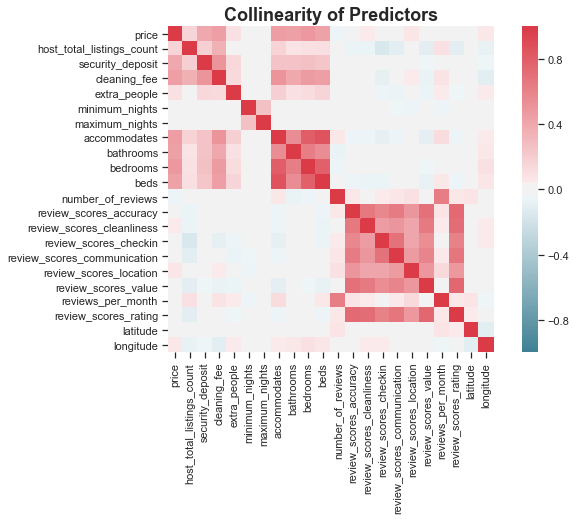

In [18]:
# Correlation matrix for all variables against each other
fig, ax = plt.subplots(figsize=(10,6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train[response+predictors].corr(), vmax = 1,vmin = -1,  center = 0, square = True, ax=ax, cmap=cmap)
ax.set_title('Collinearity of Predictors', fontweight='bold', fontsize=18)

plt.show()

In [19]:
train.corr().round(3)

price  host_total_listings_count  latitude  \
price                        1.000                      0.161     0.009   
host_total_listings_count    0.161                      1.000     0.013   
latitude                     0.009                      0.013     1.000   
longitude                    0.059                     -0.074    -0.108   
accommodates                 0.457                      0.169     0.009   
bathrooms                    0.438                      0.085    -0.019   
bedrooms                     0.484                      0.096    -0.029   
beds                         0.431                      0.103    -0.006   
security_deposit             0.395                      0.191    -0.032   
cleaning_fee                 0.452                      0.354    -0.032   
extra_people                 0.097                      0.003     0.020   
minimum_nights              -0.000                     -0.017    -0.003   
maximum_nights              -0.001                     -0.004     0.002   
number_of_reviews           -0.051                      0.031     0.071   
review_scores_rating         0.026                     -0.098     0.040   
review_scores_accuracy       0.033                     -0.060     0.029   
review_scores_cleanliness    0.043                     -0.057     0.015   
review_scores_checkin        0.006                     -0.151     0.002   
review_scores_communication  0.012                     -0.106     0.012   
review_scores_location       0.063                      0.018     0.033   
review_scores_value         -0.009                     -0.096     0.018   
reviews_per_month           -0.035                      0.087     0.077   
average_review               0.030                     -0.096     0.022   

                             longitude  accommodates  bathrooms  bedrooms  \
price                            0.059         0.457      0.438     0.484   
host_total_listings_count       -0.074         0.169      0.085     0.096   
latitude                        -0.108         0.009     -0.019    -0.029   
longitude                        1.000         0.042      0.056     0.090   
accommodates                     0.042         1.000      0.551     0.798   
bathrooms                        0.056         0.551      1.000     0.631   
bedrooms                         0.090         0.798      0.631     1.000   
beds                             0.066         0.860      0.552     0.792   
security_deposit                -0.043         0.256      0.253     0.269   
cleaning_fee                    -0.107         0.515      0.397     0.472   
extra_people                     0.042         0.188      0.089     0.120   
minimum_nights                  -0.003        -0.016      0.008    -0.001   
maximum_nights                  -0.005        -0.008     -0.006    -0.007   
number_of_reviews                0.003         0.061     -0.065    -0.054   
review_scores_rating             0.030        -0.050     -0.004    -0.012   
review_scores_accuracy           0.017        -0.049     -0.013    -0.013   
review_scores_cleanliness        0.044        -0.054     -0.019    -0.020   
review_scores_checkin            0.040        -0.082     -0.018    -0.028   
review_scores_communication      0.022        -0.048     -0.018    -0.017   
review_scores_location          -0.025         0.011     -0.024    -0.005   
review_scores_value             -0.004        -0.092     -0.038    -0.043   
reviews_per_month               -0.041         0.121     -0.036    -0.015   
average_review                   0.022        -0.068     -0.027    -0.027   

                              beds  security_deposit  cleaning_fee  \
price                        0.431             0.395         0.452   
host_total_listings_count    0.103             0.191         0.354   
latitude                    -0.006            -0.032        -0.032   
longitude                    0.066            -0.043        -0.107   
accommodates                 

from statlearning import plot_robustregressions
with sns.color_palette(crayon):
    plot_robustregressions(train[continuous+discrete+reviews], train['price'])
    plt.show()

<Figure size 432x288 with 0 Axes>

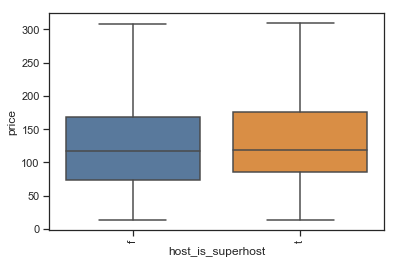

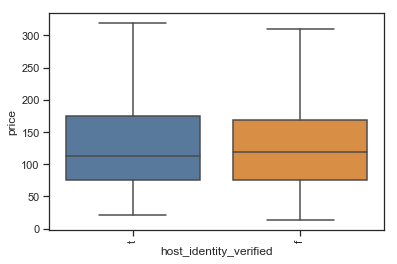

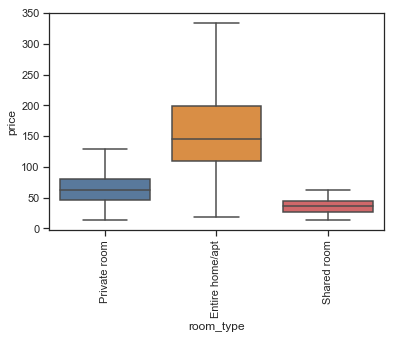

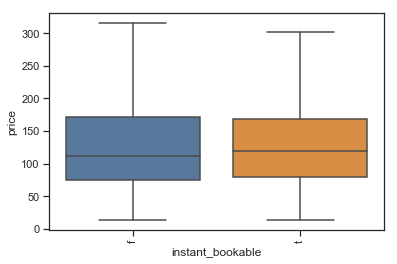

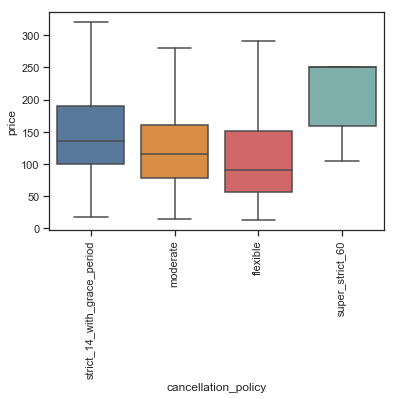

In [20]:
# Boxplots for each categorical variable against price 
fig = plt.figure()
with sns.color_palette(crayon):
    for i in categorical: 
        fig, ax = plt.subplots()
        sns.boxplot(x=i, y='price', data=train, showfliers = False) #showflier=false is used to exclude outliers
        ax.set_xticklabels(train[i].unique(), rotation='vertical')
        plt.show()

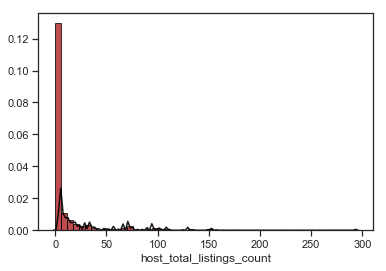

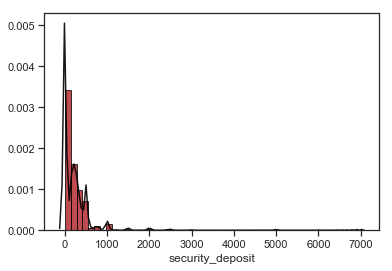

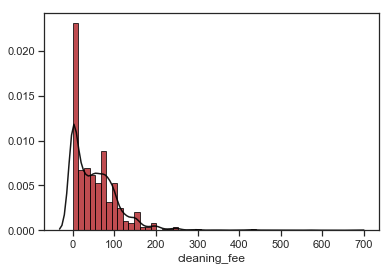

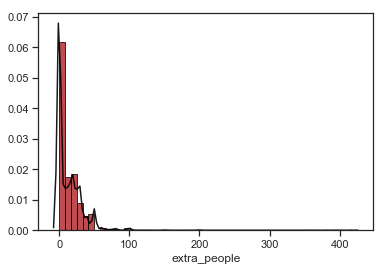

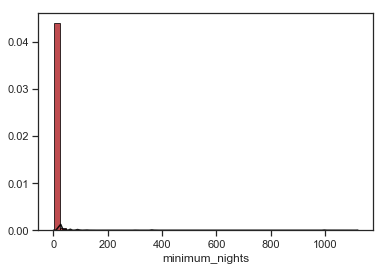

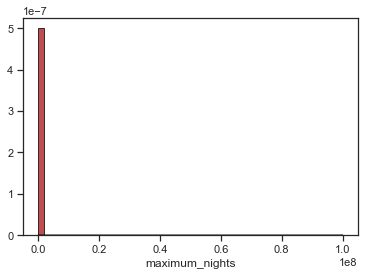

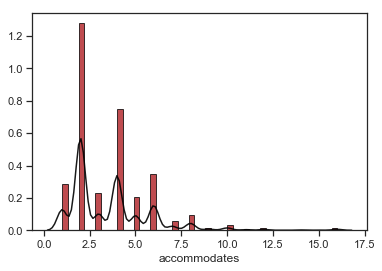

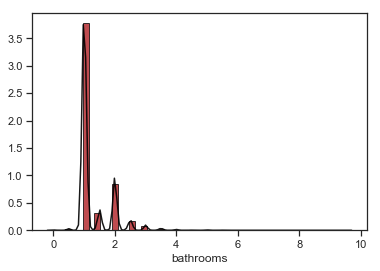

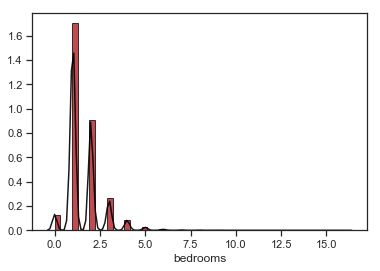

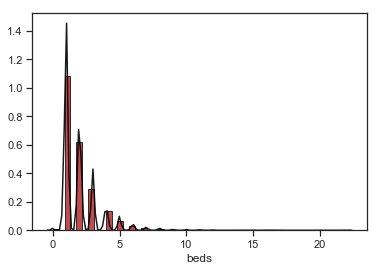

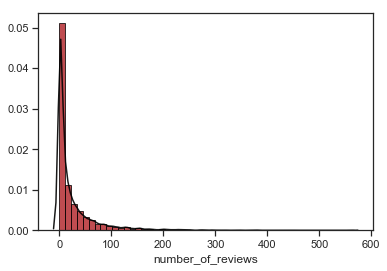

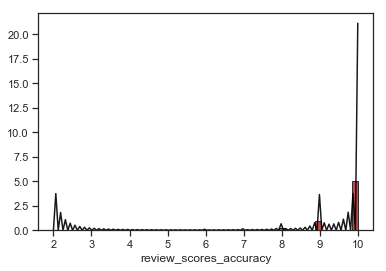

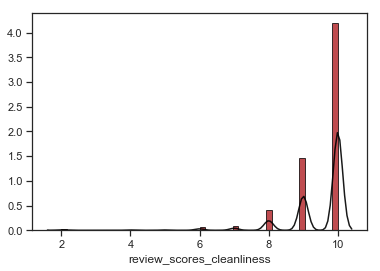

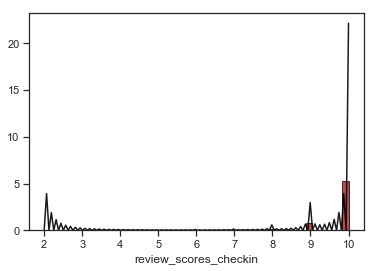

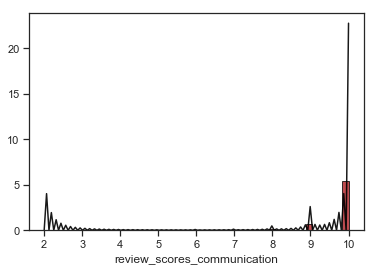

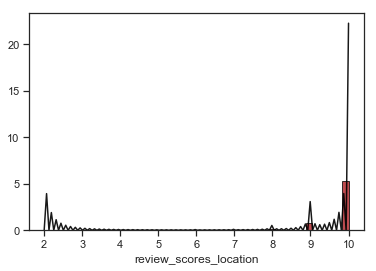

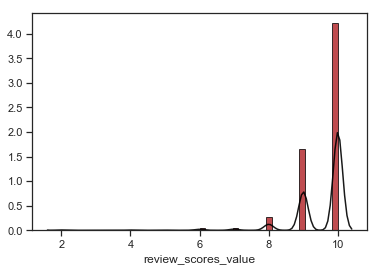

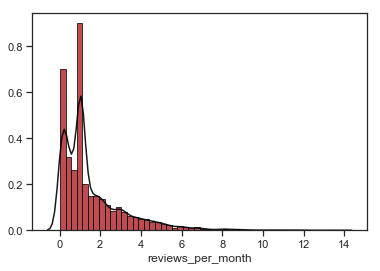

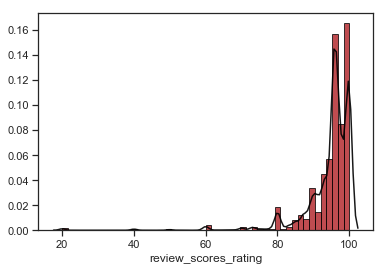

In [21]:
# EDA to help determine logs
def hist(series):
    fig, ax = plt.subplots()
    sns.distplot(series, ax=ax,
                 hist_kws={'alpha': 0.75,
                           'edgecolor':'black',
                           'color': sns.color_palette('Reds')[-1]},  
                 kde_kws={'color': 'black', 'alpha': 0.9})
    return plt.show()

for i in continuous+discrete+reviews:
    hist(train[i])

### Normality of response variable


In [22]:
def plot_histogram(series):
    fig, ax= plt.subplots(figsize=(9,6))
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.9, 'edgecolor':'black'},  
        kde_kws={'color': 'black', 'alpha': 0.7})
    sns.despine()
    return fig, ax

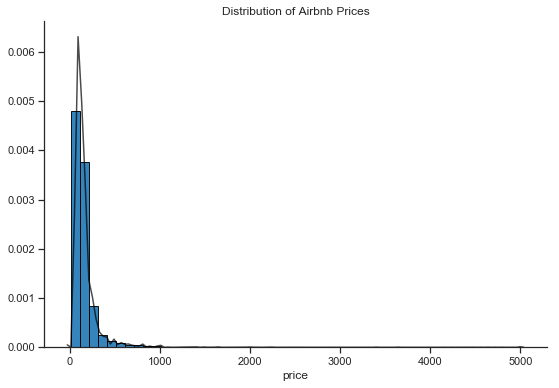

In [23]:
# Historgram for the response

plot_histogram(train['price'])
plt.title('Distribution of Airbnb Prices')
plt.show()

In [24]:
def plot_histogram_max2000(series):
    fig, ax= plt.subplots(figsize=(9,6))
    sns.distplot(series, bins = 200, ax=ax, hist_kws={'alpha': 0.9, 'edgecolor':'black'},  
        kde_kws={'color': 'black', 'alpha': 0.7})
    sns.despine()
    ax.set_xlim(-100, 2000)
    return fig, ax

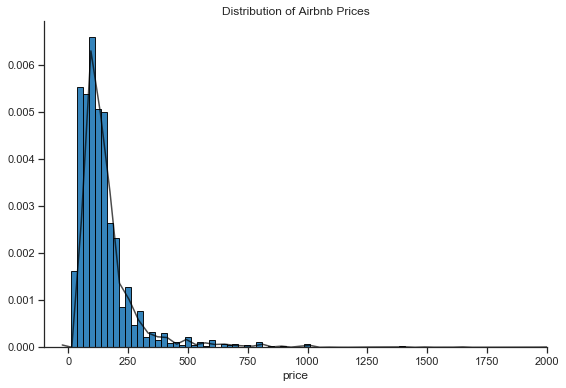

In [25]:
plot_histogram_max2000((train['price']))
plt.title('Distribution of Airbnb Prices')
plt.show()

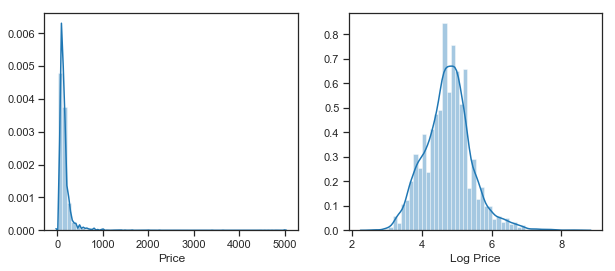

In [26]:
# Distribution of price
fig, ax = plt.subplots(1, 2, figsize=(10,4))

sns.distplot(train['price'], ax=ax[0])
ax[0].set_xlabel('Price')

sns.distplot(np.log(train['price']), ax=ax[1])
ax[1].set_xlabel('Log Price')

plt.show()

train = train.drop('price_log', axis = 1)
train = train.drop('price_boxcox', axis = 1)

### Check interactions (ANOVA, Conditional plots)

In [27]:
#ANOVA
from scipy.stats import kruskal
# Non-parametric Kruskal-Wallis ANOVA rank test - to determine class independence
H = []
p = []

for i in categorical+discrete:
    h, pval = kruskal(*[train.loc[train[i]==v,'price'] for v in train[i].unique()])
    H.append(h)
    p.append(pval)

# Calculates significance at 1% and appends results
test_results = []
for value in p:
    if value < 0.01:
        test_results.append('True')
    else:
        test_results.append('False')

# Creates tables with the values above
table = pd.DataFrame(H, columns=['H Stat'], index=categorical+discrete)
table['p values'] = pd.DataFrame(p, index=categorical+discrete)
table['Reject, \u03b1=0.01'] = pd.DataFrame(test_results, index=categorical+discrete)

table.round(2)

H Stat  p values Reject, α=0.01
host_is_superhost         18.36      0.00           True
host_identity_verified     1.45      0.23          False
room_type               3148.49      0.00           True
instant_bookable           6.72      0.01           True
cancellation_policy      456.53      0.00           True
accommodates            3313.10      0.00           True
bathrooms               1152.35      0.00           True
bedrooms                2884.23      0.00           True
beds                    2601.64      0.00           True

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


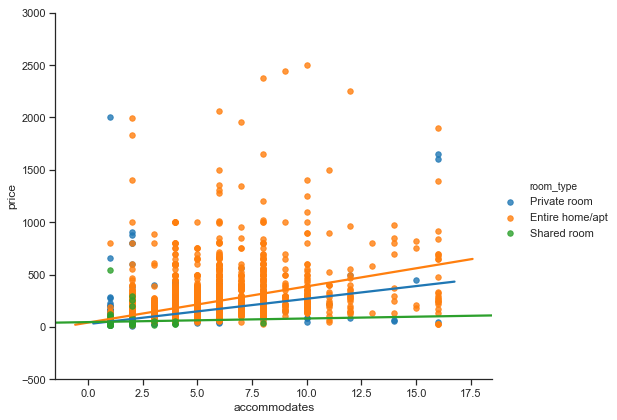

In [28]:
g = sns.lmplot('accommodates', 'price', data=train, hue='room_type', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


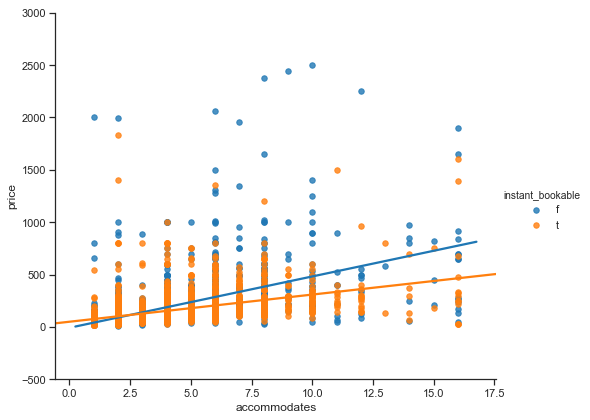

In [29]:
g = sns.lmplot('accommodates', 'price', data=train, hue='instant_bookable', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()
#new

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


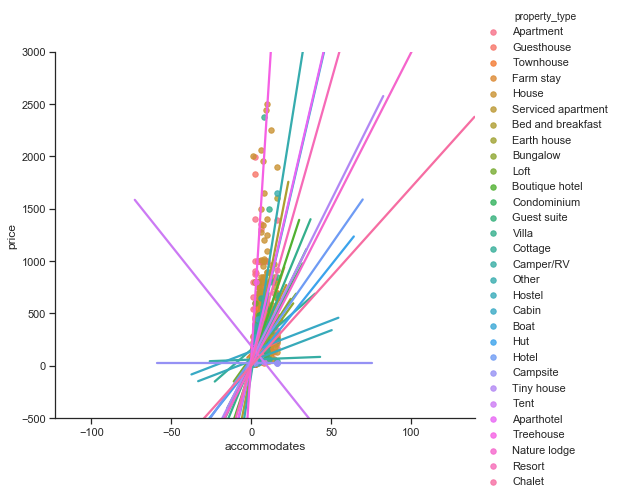

In [30]:
g = sns.lmplot('accommodates', 'price', data=train, hue='property_type', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()
# Group - apartment / house / hotel

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


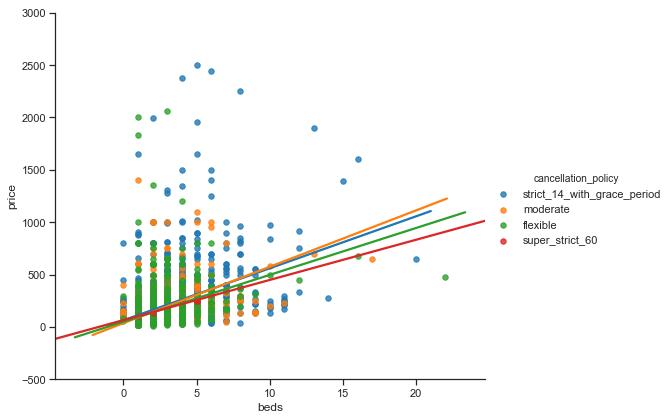

In [31]:
g = sns.lmplot('beds', 'price', data=train, hue='cancellation_policy', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()
# similar
# Group - 'blue' & others

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


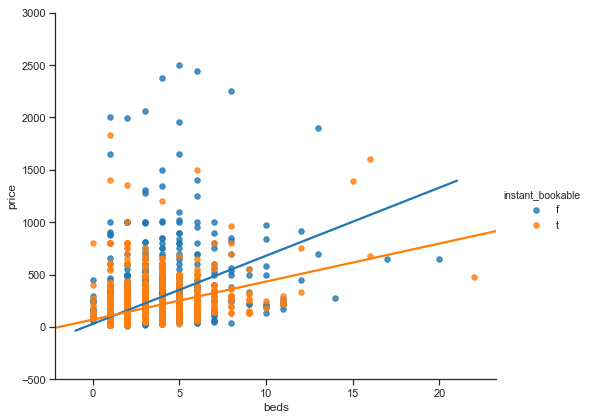

In [32]:
g = sns.lmplot('beds', 'price', data=train, hue='instant_bookable', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()
#new 

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


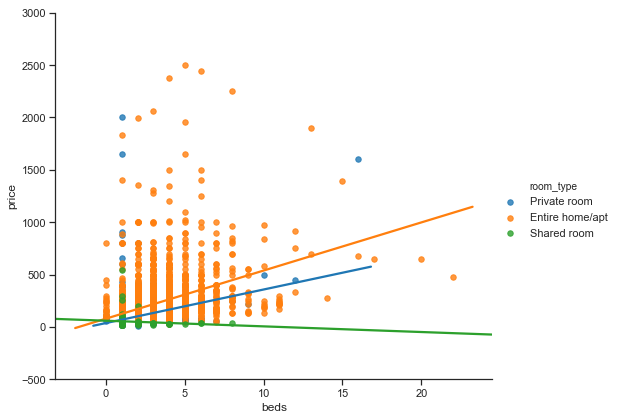

In [33]:
g = sns.lmplot('beds', 'price', data=train, hue='room_type', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


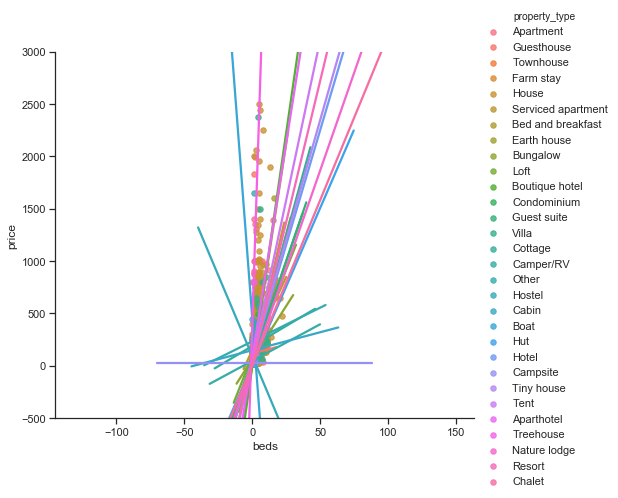

In [34]:
g = sns.lmplot('beds', 'price', data=train, hue='property_type', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


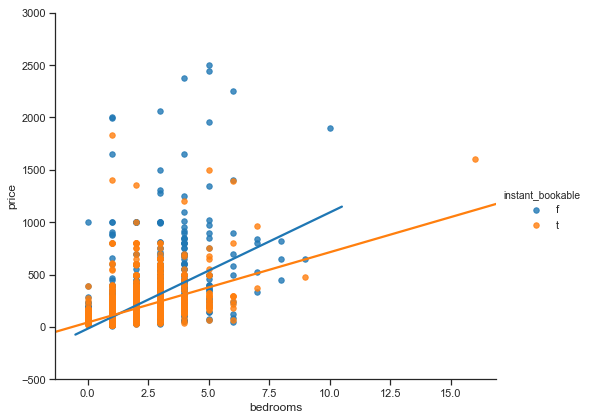

In [35]:
g = sns.lmplot('bedrooms', 'price', data=train, hue='instant_bookable', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()
#new

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


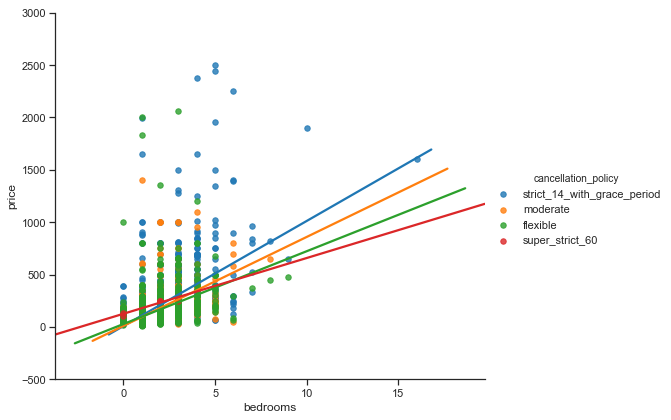

In [36]:
g = sns.lmplot('bedrooms', 'price', data=train, hue='cancellation_policy', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()
# new

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


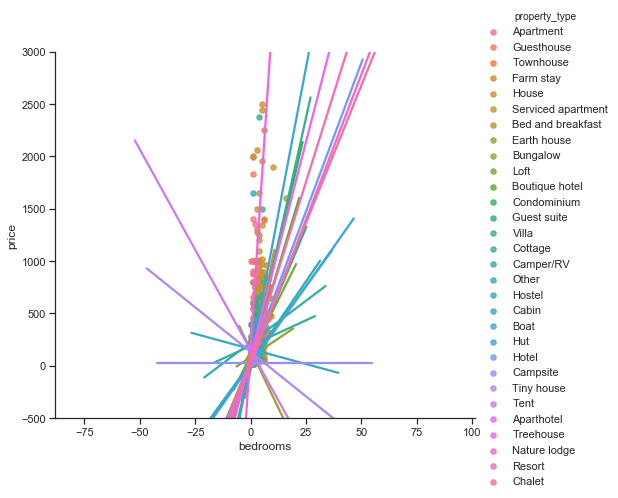

In [37]:
g = sns.lmplot('bedrooms', 'price', data=train, hue='property_type', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


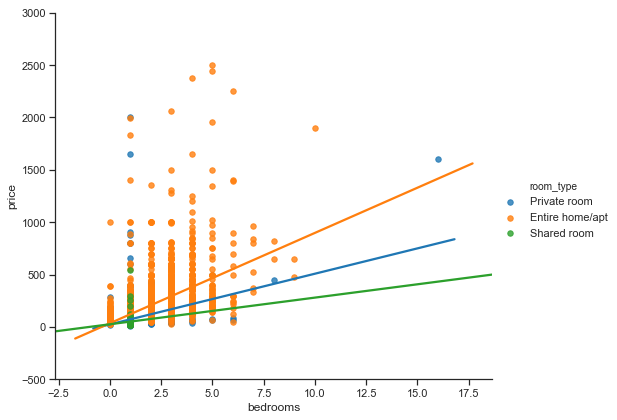

In [38]:
g = sns.lmplot('bedrooms', 'price', data=train, hue='room_type', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


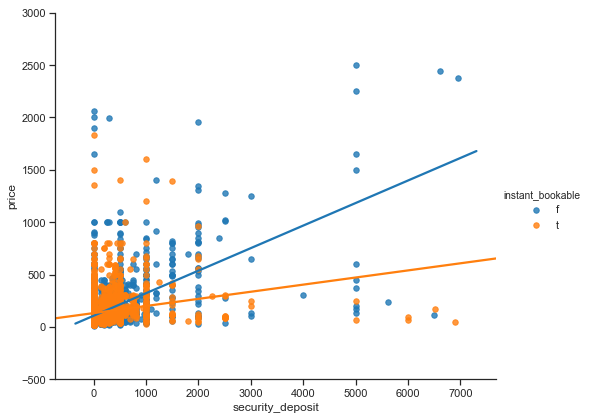

In [39]:
g = sns.lmplot('security_deposit', 'price', data=train, hue='instant_bookable', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()
# new

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


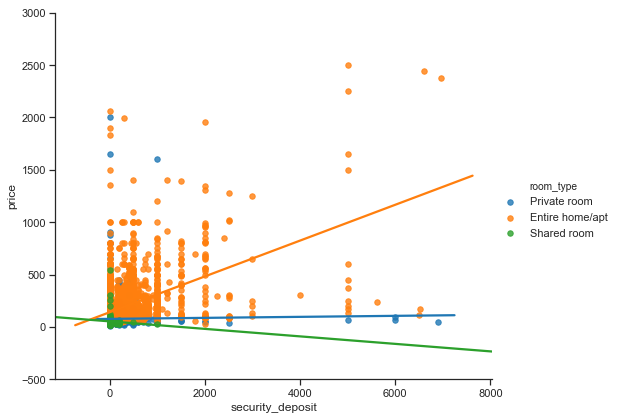

In [40]:
g = sns.lmplot('security_deposit', 'price', data=train, hue='room_type', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


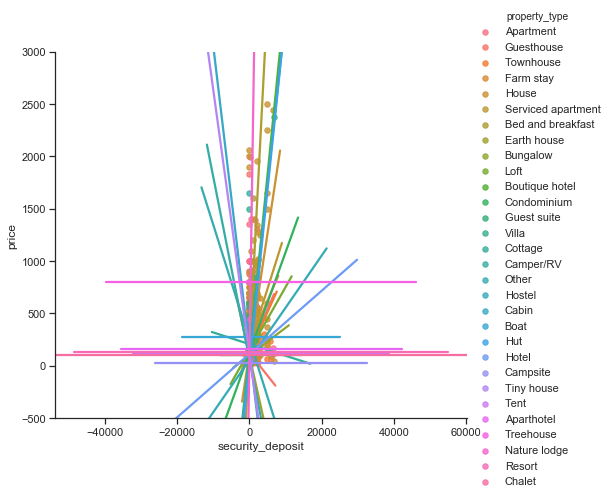

In [41]:
g = sns.lmplot('security_deposit', 'price', data=train, hue='property_type', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


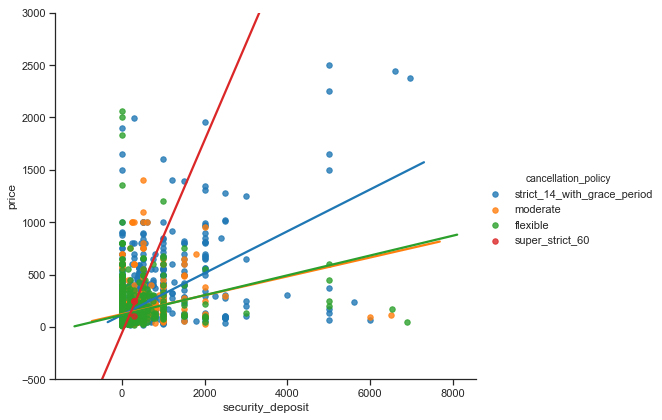

In [42]:
g = sns.lmplot('security_deposit', 'price', data=train, hue='cancellation_policy', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


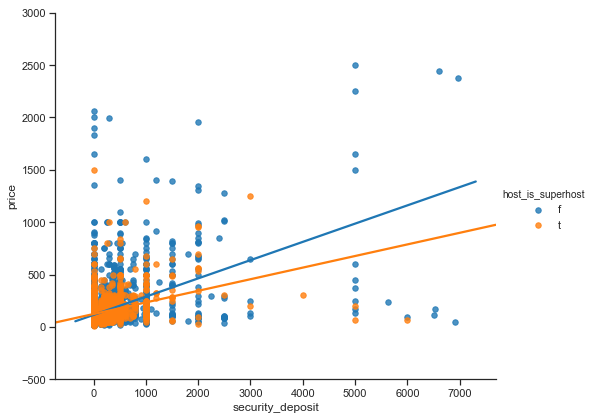

In [43]:
g = sns.lmplot('security_deposit', 'price', data=train, hue='host_is_superhost', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


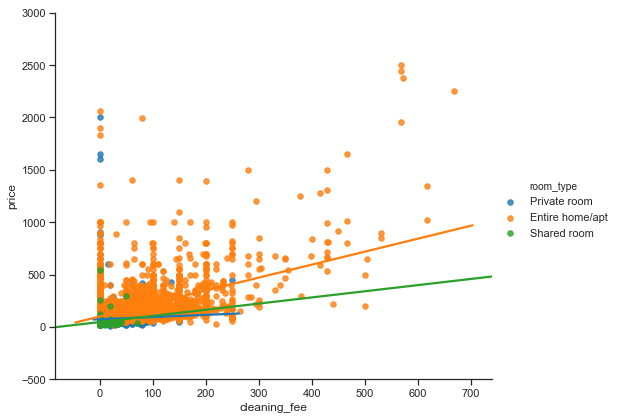

In [44]:
g = sns.lmplot('cleaning_fee', 'price', data=train, hue='room_type', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


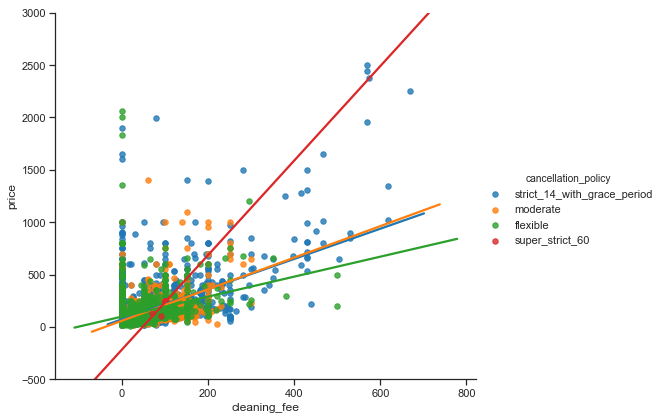

In [45]:
g = sns.lmplot('cleaning_fee', 'price', data=train, hue='cancellation_policy', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


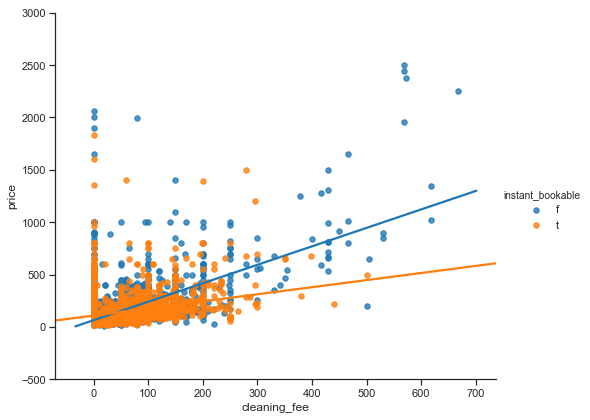

In [46]:
g = sns.lmplot('cleaning_fee', 'price', data=train, hue='instant_bookable', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


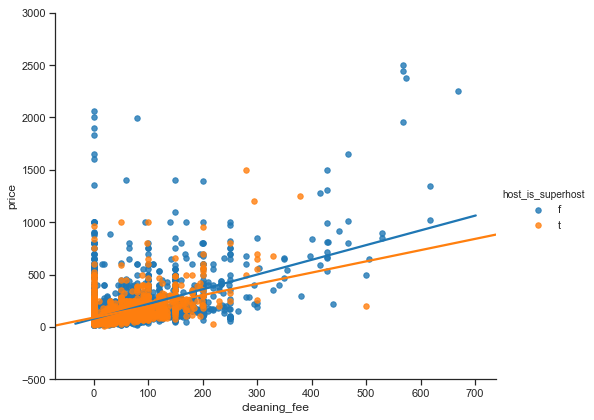

In [47]:
g = sns.lmplot('cleaning_fee', 'price', data=train, hue='host_is_superhost', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


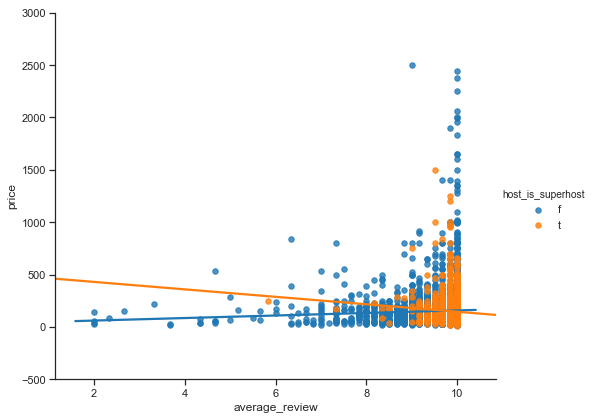

In [48]:
g = sns.lmplot('average_review', 'price', data=train, hue='host_is_superhost', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


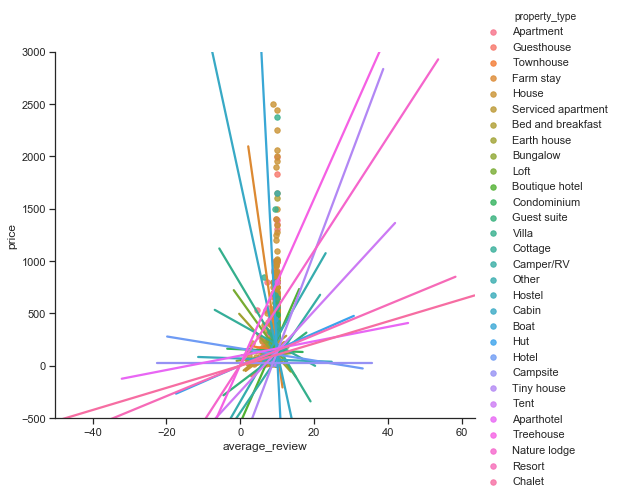

In [49]:
g = sns.lmplot('average_review', 'price', data=train, hue='property_type', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


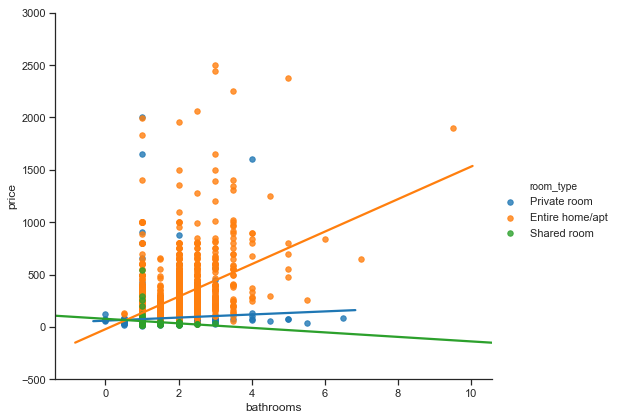

In [50]:
g = sns.lmplot('bathrooms', 'price', data=train, hue='room_type', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


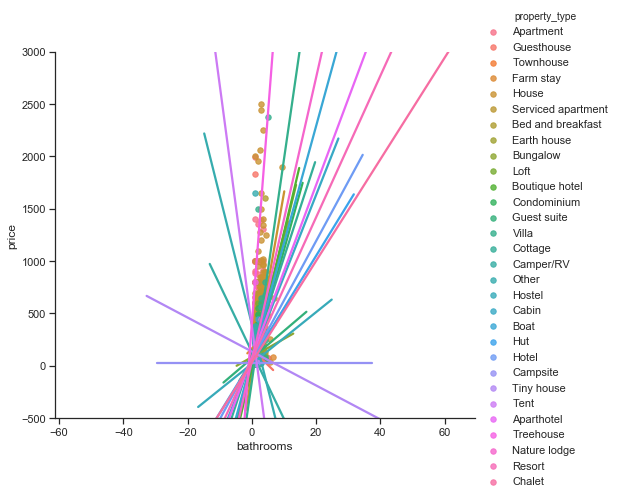

In [51]:
g = sns.lmplot('bathrooms', 'price', data=train, hue='property_type', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


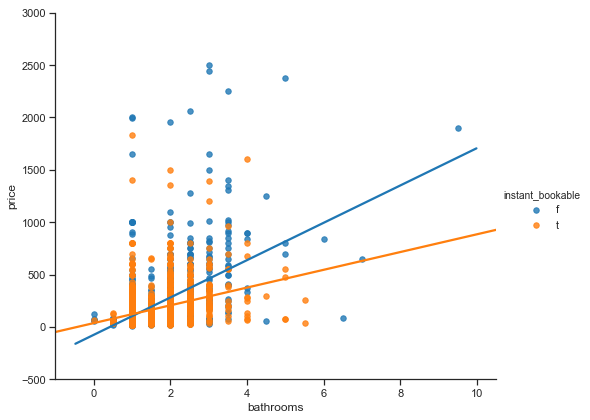

In [52]:
g = sns.lmplot('bathrooms', 'price', data=train, hue='instant_bookable', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()
# new

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


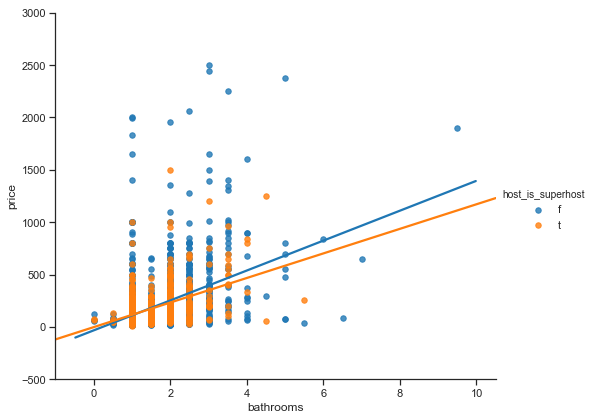

In [53]:
g = sns.lmplot('bathrooms', 'price', data=train, hue='host_is_superhost', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()
# similar
# add this back

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


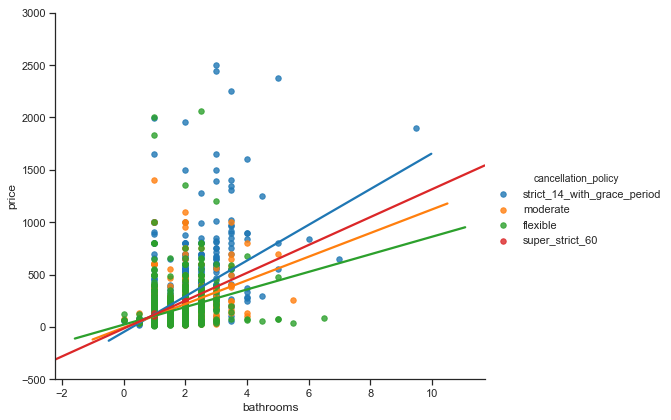

In [54]:
g = sns.lmplot('bathrooms', 'price', data=train, hue='cancellation_policy', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()
# new

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


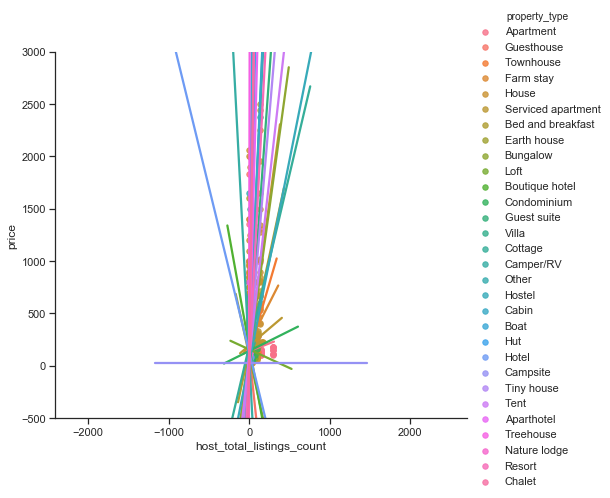

In [55]:
g = sns.lmplot('host_total_listings_count', 'price', data=train, hue='property_type', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


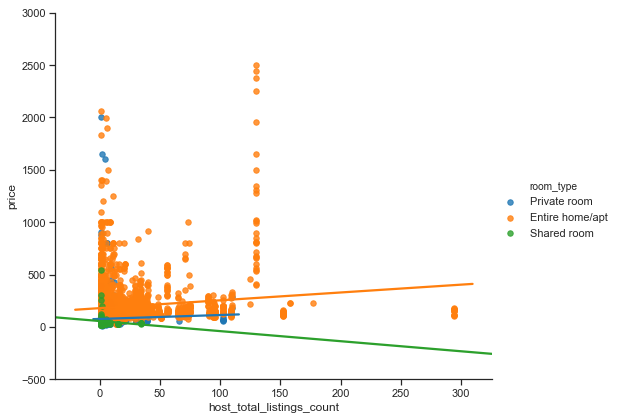

In [56]:
g = sns.lmplot('host_total_listings_count', 'price', data=train, hue='room_type', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


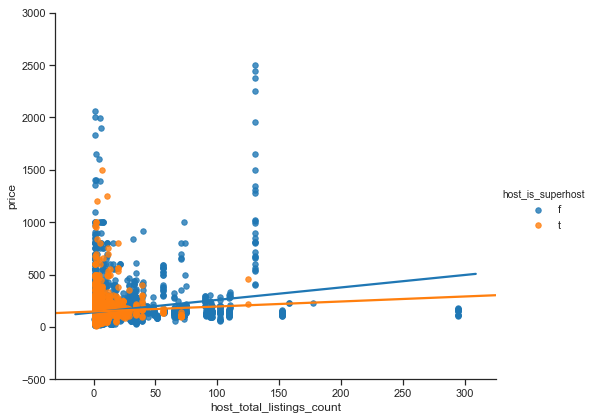

In [57]:
g = sns.lmplot('host_total_listings_count', 'price', data=train, hue='host_is_superhost', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


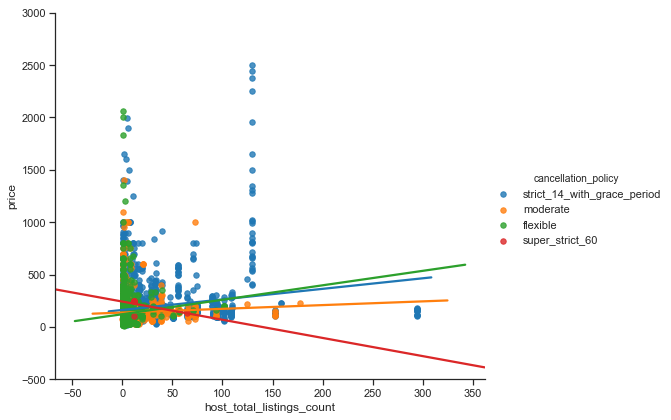

In [58]:
g = sns.lmplot('host_total_listings_count', 'price', data=train, hue='cancellation_policy', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


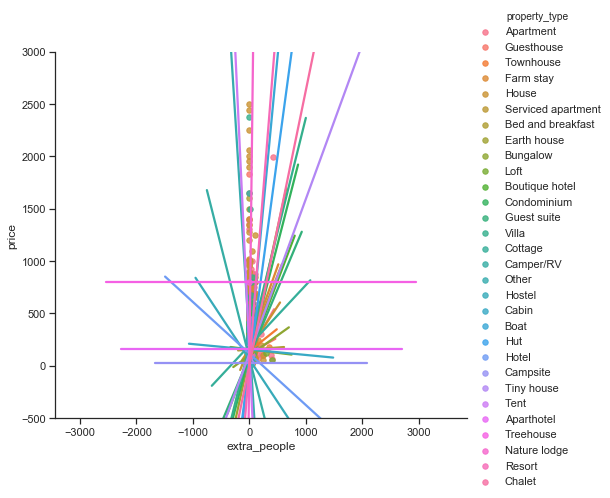

In [59]:
g = sns.lmplot('extra_people', 'price', data=train, hue='property_type', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


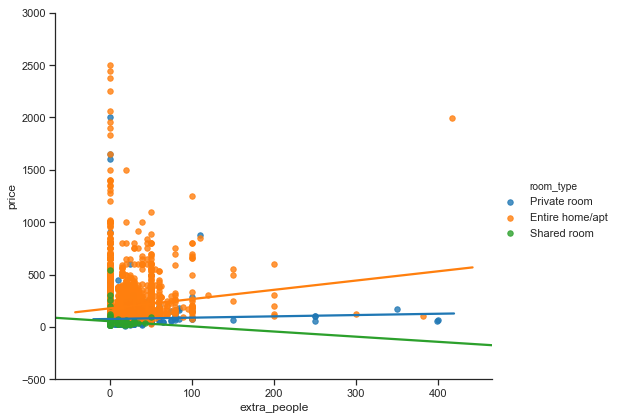

In [60]:
g = sns.lmplot('extra_people', 'price', data=train, hue='room_type', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


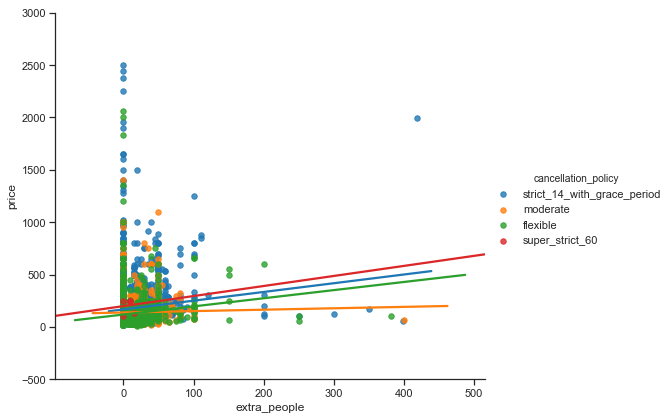

In [61]:
g = sns.lmplot('extra_people', 'price', data=train, hue='cancellation_policy', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()
# similar
# Group - 'blue' & others

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


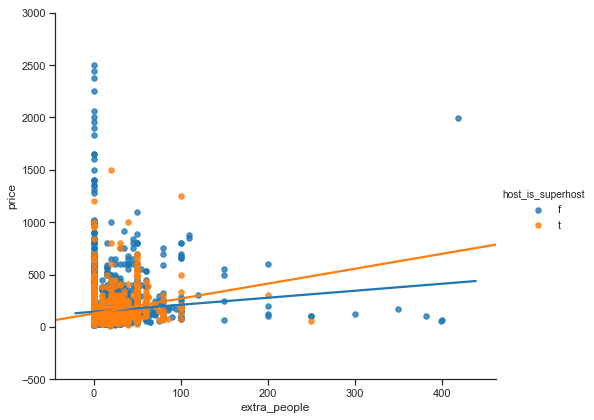

In [62]:
g = sns.lmplot('extra_people', 'price', data=train, hue='host_is_superhost', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()
#new

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


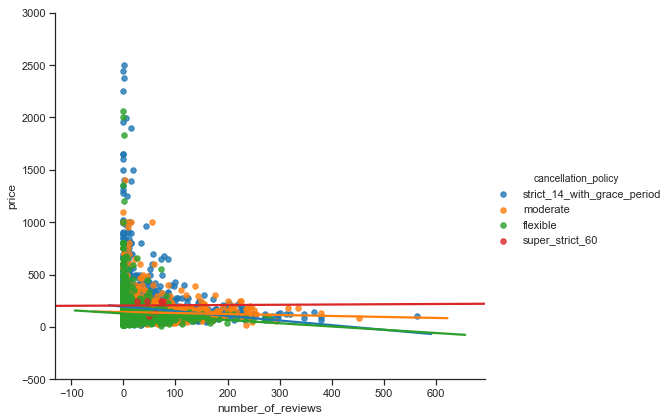

In [63]:
g = sns.lmplot('number_of_reviews', 'price', data=train, hue='cancellation_policy', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


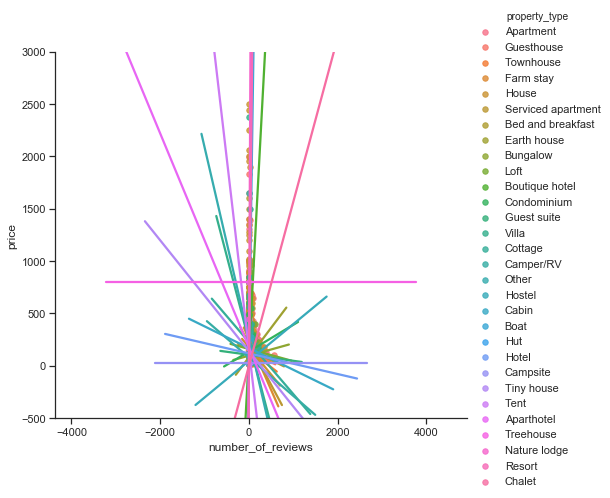

In [64]:
g = sns.lmplot('number_of_reviews', 'price', data=train, hue='property_type', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


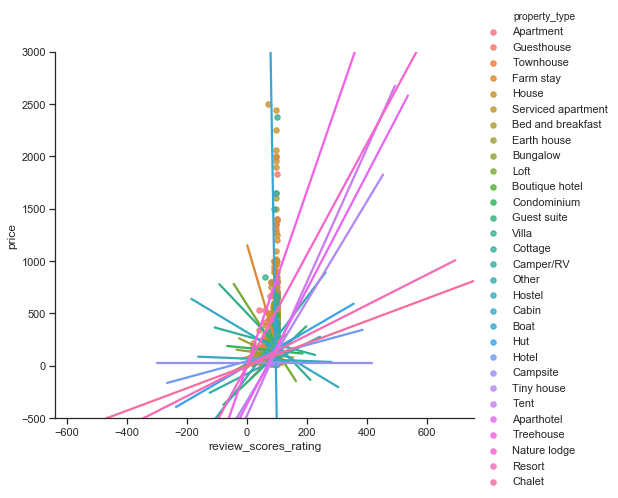

In [65]:
g = sns.lmplot('review_scores_rating', 'price', data=train, hue='property_type', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


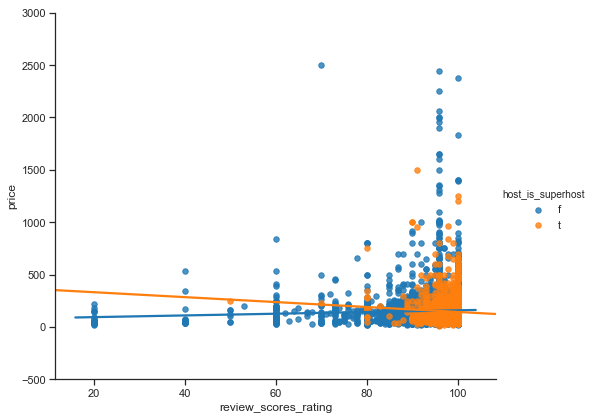

In [66]:
g = sns.lmplot('review_scores_rating', 'price', data=train, hue='host_is_superhost', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


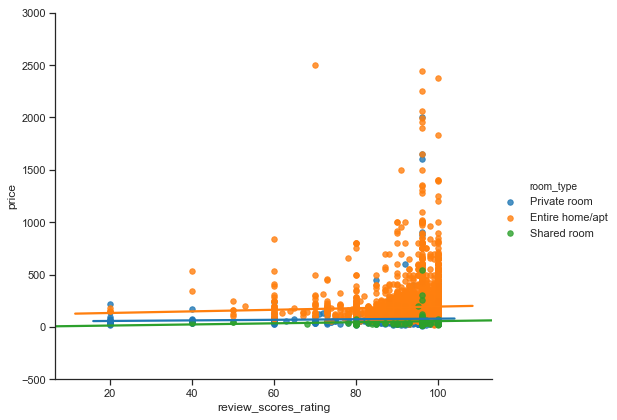

In [67]:
g = sns.lmplot('review_scores_rating', 'price', data=train, hue='room_type', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()
#similar

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


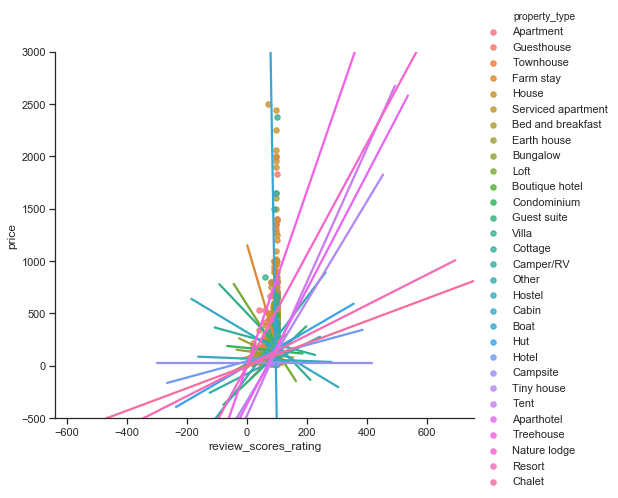

In [68]:
g = sns.lmplot('review_scores_rating', 'price', data=train, hue='property_type', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None, 
sharex = False, sharey = False)
g.set(ylim = (-500, 3000))
plt.show()

### Mapping

In [69]:
train_l_600 = train[train['price'] < 600]
train_l_600.describe()

price  host_total_listings_count     latitude    longitude  \
count  6855.000000                6855.000000  6855.000000  6855.000000   
mean    134.678483                  10.113640   -37.826263   145.009337   
std      88.887472                  24.630258     0.066028     0.129425   
min      13.000000                   0.000000   -38.224430   144.532590   
25%      75.000000                   1.000000   -37.850680   144.957695   
50%     117.000000                   2.000000   -37.817450   144.977200   
75%     165.000000                   5.000000   -37.803390   145.008950   
max     598.000000                 294.000000   -37.484830   145.839130   

       accommodates    bathrooms     bedrooms         beds  security_deposit  \
count   6855.000000  6855.000000  6855.000000  6855.000000       6855.000000   
mean       3.469292     1.272429     1.524581     1.977972        209.274106   
std        2.095937     0.522123     0.882473     1.406542        377.098136   
min        1.000000     0.000000     0.000000     0.000000          0.000000   
25%        2.000000     1.000000     1.000000     1.000000          0.000000   
50%        3.000000     1.000000     1.000000     2.000000        150.000000   
75%        4.000000     1.500000     2.000000     2.000000        300.000000   
max       16.000000     6.500000     9.000000    22.000000       6900.000000   

       cleaning_fee       ...        number_of_reviews  review_scores_rating  \
count   6855.000000       ...              6855.000000           6855.000000   
mean      51.575201       ...                25.233552             94.473815   
std       51.805577       ...                43.261289              7.571881   
min        0.000000       ...                 0.000000             20.000000   
25%        0.000000       ...                 1.000000             93.000000   
50%       45.000000       ...                 8.000000             96.000000   
75%       80.000000       ...                29.000000             99.000000   
max      500.000000       ...               563.000000            100.000000   

       review_scores_accuracy  review_scores_cleanliness  \
count             6855.000000                6855.000000   
mean                 9.708826                   9.502991   
std                  0.737983                   0.928875   
min                  2.000000                   2.000000   
25%                 10.000000                   9.000000   
50%                 10.000000                  10.000000   
75%                 10.000000                  10.000000   
max                 10.000000                  10.000000   

       review_scores_checkin  review_scores_communication  \
count            6855.000000                  6855.000000   
mean                9.767323                     9.793435   
std                 0.664217                     0.664396   
min                 2.000000                     2.000000   
25%                10.000000                    10.000000   
50%                10.000000                    10.000000   
75%                10.000000                    10.000000   
max                10.000000                    10.000000   

       review_scores_location  review_scores_value  reviews_per_month  \
count             6855.000000          6855.000000        6855.000000   
mean                 9.791831             9.567469           1.546709   
std                  0.580284             0.806899           1.579281   
min                  2.000000             2.000000           0.020000   
25%                 10.000000             9.000000           0.450000   
50%                 10.000000            10.000000           1.050000   
75%                 10.000000            10.000000           2.025000   
max                 10.000000            10.000000          13.750000   

       average_review  
count     6855.000000  
mean         9.688646  
std          0.583053  
min          2.000000  
25%          9.666667  
50

import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize = (20,15)) # Plot

ax = plt.axes(projection=ccrs.Mercator()) # Map projection
ax.coastlines(resolution='10m') 

land = cfeature.NaturalEarthFeature(category='physical', name='land', scale='10m',
                                    facecolor=cfeature.COLORS['land'])

pop = cfeature.NaturalEarthFeature(category='cultural', name='urban_areas', scale='10m', 
                                   facecolor=cfeature.COLORS['land_alt1'])

ax.add_feature(cfeature.LAND, facecolor=cfeature.COLORS['water'], zorder=1)
ax.add_feature(cfeature.OCEAN, zorder=1)

ax.add_feature(pop, edgecolor='gray', zorder=3)
ax.add_feature(land, edgecolor='gray', zorder=2)

plt.scatter(train_l_600['longitude'], train_l_600['latitude'], c=train_l_600['price'], alpha=0.5, transform=ccrs.Geodetic(), 
            cmap='Paired', zorder=8)

plt.colorbar().set_label('Price')
plt.show()

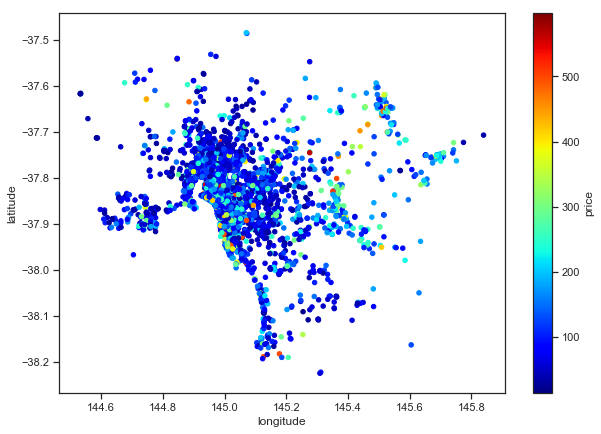

In [70]:
train_l_600.plot(kind="scatter", x="longitude", y="latitude", alpha=1, figsize=(10,7),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

In [71]:
import folium
from folium.plugins import FastMarkerCluster
lat = train['latitude']
lon = train['longitude']
locations = list(zip(lat, lon))

map_mel = folium.Map(location=[-37.815018, 144.946014],tiles='CartoDB Positron',zoom_start=10 ) #'CartoDB dark_matter'  #melb location:-37.8136° N, 144.9631° E
FastMarkerCluster(data=locations).add_to(map_mel)
map_mel

### VIF

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for multicollinearity check
pred = continuous + discrete + reviews_1 + coordinates

X = train[pred].as_matrix()
VIF = pd.DataFrame([np.sqrt(variance_inflation_factor(X,j)) for j in range(len(pred))], index=pred, columns=['SQRT(VIF)'])

VIF.sort_values(by='SQRT(VIF)', ascending=False).round(2)

SQRT(VIF)
longitude                     538.69
latitude                      538.01
average_review                 31.57
review_scores_rating           23.76
accommodates                    4.18
bedrooms                        3.66
beds                            3.49
bathrooms                       3.24
cleaning_fee                    1.87
security_deposit                1.32
extra_people                    1.21
number_of_reviews               1.18
host_total_listings_count       1.17
minimum_nights                  1.05
maximum_nights                  1.04

## 3. Feature Engineering

In [73]:
from math import radians, cos, sin, asin, sqrt

def great_circle_dist(lat1, lon1, lat2, lon2):
    '''
    Function to calculate great circle distance between two points, using Haversine formula
    '''
    
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    
    dist = 6371 * c # in km's
    return dist

In [74]:
train.head()

price host_is_superhost  host_total_listings_count host_identity_verified  \
0     85                 f                          2                      t   
1    151                 f                         18                      f   
2    188                 f                          1                      t   
3    200                 f                          1                      t   
4     90                 t                          2                      f   

   latitude  longitude property_type        room_type  accommodates  \
0 -37.81554  144.96526     Apartment     Private room             4   
1 -37.91984  145.03395     Apartment  Entire home/apt             6   
2 -37.64818  145.54512    Guesthouse  Entire home/apt             6   
3 -37.80245  144.98457     Apartment  Entire home/apt             4   
4 -37.81796  144.96541     Apartment  Entire home/apt             2   

   bathrooms       ...        review_scores_accuracy  \
0        0.5       ...                          10.0   
1        2.0       ...                          10.0   
2        1.0       ...                           9.0   
3        2.5       ...                          10.0   
4        1.0       ...                          10.0   

   review_scores_cleanliness  review_scores_checkin  \
0                       10.0                   10.0   
1                        9.0                   10.0   
2                        9.0                   10.0   
3                       10.0                   10.0   
4                       10.0                   10.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         10.0                    10.0                 10.0   
1                         10.0                    10.0                 10.0   
2                         10.0                    10.0                  9.0   
3                         10.0                    10.0                 10.0   
4                         10.0                    10.0                 10.0   

   instant_bookable          cancellation_policy  reviews_per_month  \
0                 f  strict_14_with_grace_period               3.68   
1                 t                     moderate               0.82   
2                 t  strict_14_with_grace_period               5.50   
3                 t                     flexible               0.26   
4                 t  strict_14_with_grace_period               8.06   

   average_review  
0       10.000000  
1        9.833333  
2        9.500000  
3       10.000000  
4       10.000000  

[5 rows x 29 columns]

In [75]:
categorical

['host_is_superhost',
 'host_identity_verified',
 'room_type',
 'instant_bookable',
 'cancellation_policy']

In [76]:
dummies_test = pd.get_dummies(train[categorical], drop_first = True)
data_test = pd.concat([train, dummies_test], axis=1)

In [77]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6990 entries, 0 to 6999
Data columns (total 37 columns):
price                                              6990 non-null int64
host_is_superhost                                  6990 non-null object
host_total_listings_count                          6990 non-null int64
host_identity_verified                             6990 non-null object
latitude                                           6990 non-null float64
longitude                                          6990 non-null float64
property_type                                      6990 non-null object
room_type                                          6990 non-null object
accommodates                                       6990 non-null int64
bathrooms                                          6990 non-null float64
bedrooms                                           6990 non-null float64
beds                                               6990 non-null float64
security_deposit           

In [78]:
# reclassify property type
    
train['Apartment_alike'] = np.where(train['property_type']=='Apartment', 1, 0)
train['Apartment_alike'] = np.where(train['property_type']=='Serviced apartment', 1, 0)
train['Apartment_alike'] = np.where(train['property_type']=='Loft', 1, 0)
train['Apartment_alike'] = np.where(train['property_type']=='Condominium', 1, 0) 
train['Hotel_alike'] = np.where(train['property_type']=='Boutique hotel', 1, 0)    
train['Hotel_alike'] = np.where(train['property_type']=='Guest suite', 1, 0)    
train['Hotel_alike'] = np.where(train['property_type']=='Aparthotel', 1, 0)    
train['Hotel_alike'] = np.where(train['property_type']=='Resort', 1, 0)    
train['Hotel_alike'] = np.where(train['property_type']=='Chalet', 1, 0)    
train['Hotel_alike'] = np.where(train['property_type']=='Hostel', 1, 0)    
train['House_alike'] = np.where(train['property_type']=='House', 1, 0)
train['House_alike'] = np.where(train['property_type']=='Guesthouse', 1, 0)
train['House_alike'] = np.where(train['property_type']=='Townhouse', 1, 0)    
train['House_alike'] = np.where(train['property_type']=='Earth house', 1, 0)    
train['House_alike'] = np.where(train['property_type']=='Bungalow', 1, 0)    
train['House_alike'] = np.where(train['property_type']=='Villa', 1, 0)    
train['House_alike'] = np.where(train['property_type']=='Cottage', 1, 0)    
train['House_alike'] = np.where(train['property_type']=='Cabin', 1, 0)    
train['House_alike'] = np.where(train['property_type']=='Tiny house', 1, 0)    
train['House_alike'] = np.where(train['property_type']=='Treehouse', 1, 0)    
train['House_alike'] = np.where(train['property_type']=='Nature lodge', 1, 0)
#train['Other_alike'] = np.where(train['property_type']=='Camper/RV',1,0)
#train['Other_alike'] = np.where(train['property_type']=='Farm stay',1,0)
#train['Other_alike'] = np.where(train['property_type']=='Bed and breakfast',1,0)
    
    
test['Apartment_alike'] = np.where(test['property_type']=='Apartment', 1, 0)
test['Apartment_alike'] = np.where(test['property_type']=='Serviced apartment', 1, 0)
test['Apartment_alike'] = np.where(test['property_type']=='Loft', 1, 0)
test['Apartment_alike'] = np.where(test['property_type']=='Condominium', 1, 0) 
test['Hotel_alike'] = np.where(test['property_type']=='Boutique', 1, 0)    
test['Hotel_alike'] = np.where(test['property_type']=='Guest suite', 1, 0)    
test['Hotel_alike'] = np.where(test['property_type']=='Aparthotel', 1, 0)    
test['Hotel_alike'] = np.where(test['property_type']=='Resort', 1, 0)    
test['Hotel_alike'] = np.where(test['property_type']=='Chalet', 1, 0)    
test['Hotel_alike'] = np.where(test['property_type']=='Hostel', 1, 0)    
test['House_alike'] = np.where(test['property_type']=='House', 1, 0)
test['House_alike'] = np.where(test['property_type']=='Guesthouse', 1, 0)
test['House_alike'] = np.where(test['property_type']=='Townhouse', 1, 0)    
test['House_alike'] = np.where(test['property_type']=='Earth house', 1, 0)    
test['House_alike'] = np.where(test['property_type']=='Bungalow', 1, 0)    
test['House_alike'] = np.where(test['property_type']=='Villa', 1, 0)    
test['House_alike'] = np.where(test['property_type']=='Cottage', 1, 0)    
test['House_alike'] = np.where(test['property_type']=='Cabin', 1, 0)    
test['House_alike'] = np.where(test['property_type']=='Tiny house', 1, 0)    
test['House_alike'] = np.where(test['property_type']=='Treehouse', 1, 0)    
test['House_alike'] = np.where(test['property_type']=='Nature lodge', 1, 0)       

In [79]:
train.head()

price host_is_superhost  host_total_listings_count host_identity_verified  \
0     85                 f                          2                      t   
1    151                 f                         18                      f   
2    188                 f                          1                      t   
3    200                 f                          1                      t   
4     90                 t                          2                      f   

   latitude  longitude property_type        room_type  accommodates  \
0 -37.81554  144.96526     Apartment     Private room             4   
1 -37.91984  145.03395     Apartment  Entire home/apt             6   
2 -37.64818  145.54512    Guesthouse  Entire home/apt             6   
3 -37.80245  144.98457     Apartment  Entire home/apt             4   
4 -37.81796  144.96541     Apartment  Entire home/apt             2   

   bathrooms     ...       review_scores_communication  \
0        0.5     ...                              10.0   
1        2.0     ...                              10.0   
2        1.0     ...                              10.0   
3        2.5     ...                              10.0   
4        1.0     ...                              10.0   

   review_scores_location  review_scores_value  instant_bookable  \
0                    10.0                 10.0                 f   
1                    10.0                 10.0                 t   
2                    10.0                  9.0                 t   
3                    10.0                 10.0                 t   
4                    10.0                 10.0                 t   

           cancellation_policy  reviews_per_month  average_review  \
0  strict_14_with_grace_period               3.68       10.000000   
1                     moderate               0.82        9.833333   
2  strict_14_with_grace_period               5.50        9.500000   
3                     flexible               0.26       10.000000   
4  strict_14_with_grace_period               8.06       10.000000   

   Apartment_alike  Hotel_alike  House_alike  
0                0            0            0  
1                0            0            0  
2                0            0            0  
3                0            0            0  
4                0            0            0  

[5 rows x 32 columns]

In [80]:
can_pol_list = ['cancellation_policy_moderate','cancellation_policy_strict_14_with_grace_period',
               'cancellation_policy_super_strict_60']

can_pol_interaction_terms = ['security_deposit', 'cleaning_fee', 'host_total_listings_count', 
                            'number_of_reviews','bedrooms','bathrooms']

for i in can_pol_list:
    for t in can_pol_interaction_terms:
        data_test[i + ':' + t] = data_test[i].mul(data_test[t])

In [81]:
def engineer(data):
    '''
    Feature engineering (encoding, transforming, and creating new variables)
    '''
    
    # Dummy Variables
    
    #data['d_host_is_superhost']=np.where(data['host_is_superhost']=='t', 1, 0)
    #data['d_host_identity_verified']=np.where(data['host_identity_verified']=='t', 1, 0)
    #data['d_instant_bookable']=np.where(data['instant_bookable']=='t', 1, 0)
    #data['cancellation_policy_strict_14_with_grace_period']=np.where(data['cancellation_policy']=='strict_14_with_grace_period',1,0)
    #data['cancellation_policy_super_flexible']=np.where(data['cancellation_policy']=='flexible',1,0)
    #data['cancellation_policy_moderate']=np.where(data['cancellation_policy']=='moderate',1,0)
    #data['room_type_Private']=np.where(data['room_type']=='Private room',1,0)
    #data['room_type_Entire_home']=np.where(data['room_type']=='Entire home/apt',1,0)
    
    
    dummies = pd.get_dummies(data[categorical], drop_first = True)
    data = pd.concat([data, dummies], axis=1)
    data = data.drop(columns = categorical)
    data = data.drop(columns = regroup)
      
    # New predictors
        ## Distance to flinders station
    melb_lat, melb_lon = -37.8183, 144.9671 # Melb Flinders Station

    distance_flinder = []
    for i in np.arange(len(data)):
        lat = data['latitude'].iloc[i]
        lon = data['longitude'].iloc[i]

        dist = great_circle_dist(melb_lat, melb_lon, lat, lon)
        distance_flinder.append(dist)

    distance_flinder = pd.DataFrame(distance_flinder, columns=['distance_flinder'])
    data = pd.concat([data, distance_flinder], axis=1)
        ## Distance to essendon airport
    melb_lat, melb_lon = -37.7264, 144.9015 # Melb essendon airport

    distance_essendon = []
    for i in np.arange(len(data)):
        lat = data['latitude'].iloc[i]
        lon = data['longitude'].iloc[i]

        dist = great_circle_dist(melb_lat, melb_lon, lat, lon)
        distance_essendon.append(dist)

    distance_essendon = pd.DataFrame(distance_essendon, columns=['distance_essendon'])
    data = pd.concat([data, distance_essendon], axis=1)
    
    ## Distance to st kilda beach
    melb_lat, melb_lon = -37.8679, 144.9740 # St kilda beach

    distance_st_kilda = []
    for i in np.arange(len(data)):
        lat = data['latitude'].iloc[i]
        lon = data['longitude'].iloc[i]

        dist = great_circle_dist(melb_lat, melb_lon, lat, lon)
        distance_st_kilda.append(dist)

    distance_st_kilda = pd.DataFrame(distance_st_kilda, columns=['distance_st_kilda'])
    data = pd.concat([data, distance_st_kilda], axis=1)
    ## Distance to Melbourne zoo
    melb_lat, melb_lon = -37.7841, 144.9515 # Melbourne zoo

    distance_mel_zoo = []
    for i in np.arange(len(data)):
        lat = data['latitude'].iloc[i]
        lon = data['longitude'].iloc[i]

        dist = great_circle_dist(melb_lat, melb_lon, lat, lon)
        distance_mel_zoo.append(dist)

    distance_mel_zoo = pd.DataFrame(distance_mel_zoo, columns=['distance_mel_zoo'])
    data = pd.concat([data, distance_mel_zoo], axis=1)
    
    ## Distance to State library
    melb_lat, melb_lon = -37.8098, 144.9652 # State library

    distance_state_library = []
    for i in np.arange(len(data)):
        lat = data['latitude'].iloc[i]
        lon = data['longitude'].iloc[i]

        dist = great_circle_dist(melb_lat, melb_lon, lat, lon)
        distance_state_library.append(dist)

    distance_state_library = pd.DataFrame(distance_state_library, columns=['distance_state_library'])
    data = pd.concat([data, distance_state_library], axis=1)
    
    ## Distance to South bank
    melb_lat, melb_lon = -37.8290,144.9570 # South bank

    distance_south_bank = []
    for i in np.arange(len(data)):
        lat = data['latitude'].iloc[i]
        lon = data['longitude'].iloc[i]

        dist = great_circle_dist(melb_lat, melb_lon, lat, lon)
        distance_south_bank.append(dist)

    distance_south_bank = pd.DataFrame(distance_south_bank, columns=['distance_south_bank'])
    data = pd.concat([data, distance_south_bank], axis=1)
    
    ## Distance to Star Wheel
    melb_lat, melb_lon = -37.8110,144.9368 # Star Wheel

    distance_star_wheel = []
    for i in np.arange(len(data)):
        lat = data['latitude'].iloc[i]
        lon = data['longitude'].iloc[i]

        dist = great_circle_dist(melb_lat, melb_lon, lat, lon)
        distance_star_wheel.append(dist)

    distance_star_wheel = pd.DataFrame(distance_star_wheel, columns=['distance_star_wheel'])
    data = pd.concat([data, distance_star_wheel], axis=1)
    
    ## Distance to Richmond
    melb_lat, melb_lon = -37.8230,144.9980 # Richmond

    distance_richmond = []
    for i in np.arange(len(data)):
        lat = data['latitude'].iloc[i]
        lon = data['longitude'].iloc[i]

        dist = great_circle_dist(melb_lat, melb_lon, lat, lon)
        distance_richmond.append(dist)

    distance_richmond = pd.DataFrame(distance_richmond, columns=['distance_richmond'])
    data = pd.concat([data, distance_richmond], axis=1)
    
            ## Intuition-based
    #data['beds_per_person'] = data['beds'] / data['accommodates']
    #data['bathrooms_per_person'] = data['bathrooms'] / data['accommodates']
    #data['bedrooms_per_person'] = data['bedrooms'] / data['accommodates']
    #data['beds_per_bedrooms'] = data['beds'] / data['bedrooms']
    #data['bathrooms_per_bedroom'] = data['bathrooms'] / data['bedrooms']
    #data['extra_people_vs_accommodates'] = data['extra_people'] / data['accommodates']
    data['minmax_nights_range'] = data['maximum_nights'] - data['minimum_nights']
    data['fee_per_person'] = (data['security_deposit'] + data['cleaning_fee']) / data['accommodates']
    #data['opening_time'] = data['number_of_reviews']/data['reviews_per_month']
    review_combination = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                          'review_scores_communication', 'review_scores_location', 'review_scores_value']
    data['average_review'] = data[review_combination].mean(axis=1)
    
    # Interactions (based on EDA)
        ## Interactions with room type
    
    data['accommodates:room_type_Private room'] = data['accommodates'] * data['room_type_Private room']
    data['beds:room_type_Private room'] = data['beds'] * data['room_type_Private room']
    data['bedrooms:room_type_Private room'] = data['bedrooms'] * data['room_type_Private room']
    data['security_deposit:room_type_Private room'] = data['security_deposit'] * data['room_type_Private room']
    data['bathrooms:room_type_Private room'] = data['bathrooms'] * data['room_type_Private room']
    data['cleaning_fee:room_type_Private room'] = data['cleaning_fee'] * data['room_type_Private room']
    data['average_review:room_type_Private room'] = data['average_review'] * data['room_type_Private room']
    data['extra_people:room_type_Private room'] = data['extra_people'] * data['room_type_Private room']
    data['host_total_listings_count:room_type_Private room'] = data['host_total_listings_count'] * data['room_type_Private room']
    
    data['accommodates:room_type_Shared room'] = data['accommodates'] * data['room_type_Shared room']
    data['beds:room_type_Shared room'] = data['beds'] * data['room_type_Shared room']
    data['bedrooms:room_type_Shared room'] = data['bedrooms'] * data['room_type_Shared room']
    data['security_deposit:room_type_Shared room'] = data['security_deposit'] * data['room_type_Shared room']
    data['bathrooms:room_type_Shared room'] = data['bathrooms'] * data['room_type_Shared room']
    data['cleaning_fee:room_type_Shared room'] = data['cleaning_fee'] * data['room_type_Shared room']
    data['average_review:room_type_Shared room'] = data['average_review'] * data['room_type_Shared room']
    data['extra_people:room_type_Shared room'] = data['extra_people'] * data['room_type_Shared room']
    data['host_total_listings_count:room_type_Shared room'] = data['host_total_listings_count'] * data['room_type_Shared room']
    
        ## Interactions with cancellation_policy
    can_pol_list = ['cancellation_policy_moderate','cancellation_policy_strict_14_with_grace_period',
                   'cancellation_policy_super_strict_60']
    
    can_pol_interaction_terms = ['security_deposit', 'cleaning_fee', 'host_total_listings_count', 
                                'number_of_reviews','bedrooms','bathrooms']
    
    for i in can_pol_list:
        for t in can_pol_interaction_terms:
            data['i' + ':' + t] = data[i].mul(data[t])
    
    #data['cancellation_policy:security_deposit'] = data['cancellation_policy'] * data['security_deposit']
    #data['cancellation_policy:cleaning_fee'] = data['cancellation_policy'] * data['cleaning_fee']
    #data['cancellation_policy:host_total_listings_count'] = data['cancellation_policy'] * data['host_total_listings_count']
    #data['cancellation_policy:cleaning_fee'] = data['cancellation_policy'] * data['number_of_reviews']
    #data['cancellation_policy:bedrooms'] = data['cancellation_policy'] * data['bedrooms']
    #data['cancellation_policy:bathrooms'] = data['cancellation_policy'] * data['bathrooms']
        ## Interactions with instant_bookable
    data['instant_bookable_t:cleaning_fee'] = data['instant_bookable_t'] * data['cleaning_fee']
    data['instant_bookable_t:security_deposit'] = data['instant_bookable_t'] * data['security_deposit']
    data['instant_bookable_t:accommodates'] = data['instant_bookable_t'] * data['accommodates']
    data['instant_bookable_t:bedrooms'] = data['instant_bookable_t'] * data['bedrooms']
    data['instant_bookable_t:beds'] = data['instant_bookable_t'] * data['beds']
    data['instant_bookable_t:bathrooms'] = data['instant_bookable_t'] * data['bathrooms']
        ## More interactions need to be checked
    
    
    his_interaction_terms = ['security_deposit', 'cleaning_fee', 'average_review', 
                                'host_total_listings_count','review_scores_rating','extra_people']
    
    for t in his_interaction_terms:
        data['host_is_superhost_t' + ':' + t] = data['host_is_superhost_t'].mul(data[t])

    
    #hiv_interaction_terms = ['security_deposit', 'cleaning_fee', 'accommodates', 
                                #'bedrooms','bathrooms','extra_people','host_total_listings_count']
    #for term in hiv_interaction_terms:
        #data['host_identity_verified_t' + ':' + term] = data['host_identity_verified_t'].mul(data[term]) 
    
    #data['host_is_superhost:security_deposit'] = data['host_is_superhost'] * data['security_deposit']
    #data['host_is_superhost:cleaning_fee'] = data['host_is_superhost'] * data['cleaning_fee']
    #data['host_is_superhost:average_review'] = data['host_is_superhost'] * data['average_review']
    #data['host_total_listings_count:host_is_superhost'] = data['host_total_listings_count'] * data['host_is_superhost']
    #data['review_scores_rating:host_is_superhost'] = data['review_scores_rating'] * data['host_is_superhost']
    #data['extra_people:host_is_superhost'] = data['extra_people'] * data['host_is_superhost']
    #data['host_identity_verified:cleaning_fee'] = data['host_identity_verified'] * data['cleaning_fee']
    #data['host_identity_verified:security_deposit'] = data['host_identity_verified'] * data['security_deposit']
    #data['host_identity_verified:accommodates'] = data['host_identity_verified'] * data['accommodates']
    #data['host_identity_verified:bedrooms'] = data['host_identity_verified'] * data['bedrooms']
    #data['host_identity_verified:bathrooms'] = data['host_identity_verified'] * data['bathrooms']
    #data['host_identity_verified:extra_people'] = data['host_identity_verified'] * data['extra_people']
    #data['host_identity_verified:host_total_listings_count'] = data['host_identity_verified'] * data['host_total_listings_count']
    
    # Log transformations (determined with EDA)
    pred_to_log = ['host_total_listings_count', 'security_deposit', 'cleaning_fee', 'extra_people',
                   'minimum_nights', 'maximum_nights', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
                   'number_of_reviews', 'review_scores_rating', 'reviews_per_month',
                   'fee_per_person','average_review', 'minmax_nights_range',
                   ] #+ review_combination
                   #'distance_state_library','distance_star_wheel','distance_st_kilda','distance_richmond','distance_south_bank','distance_mel_zoo','distance_essendon','distance_flinder',
    for i in pred_to_log:
        data[str('log_')+i] = np.log(data[i])
    
    # Data to drop (Check model performance)
    data = data.drop(columns=review_combination)
    data = data.drop(columns=coordinates)
    data = data.drop(columns=discrete)
    data = data.drop(columns=continuous)
    

    # Necessary due to new predictors that divided by zero, etc.
    data = data.replace([np.inf, -np.inf], 0)
    data = data.replace([np.nan], 0)
    
    
    return data


from math import radians, cos, sin, asin, sqrt
def haversine_stkildabeach(row):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    lat1 = -37.864
    lon1 = 144.982
    lon2 = row['longitude']
    lat2 = row['latitude']
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 
    return round(c * r,2)

In [82]:
# Step 1. Run processing
train_processed = engineer(impute(train))
test_processed = engineer(impute(test))

response = 'price'
predictors = [x for x in list(train_processed.columns) if x not in response]

# Step 2. Get the scaler for scaling train / test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train_processed[predictors])


# Step 3. Scaler for train / test
def scale(data):
    data_scaled = scaler.transform(data[predictors])
    data = pd.DataFrame(data_scaled, columns=predictors)
    
    return data

# Step 4. Scale and split
X_train = scale(train_processed) # removes response
y_train = np.log(train_processed['price']) # need to check performance with 'log'

X_test = scale(test_processed)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


In [83]:
pd.set_option('display.max_columns', None) 
X_train.head()

number_of_reviews  review_scores_rating  reviews_per_month  average_review  \
0           2.099394              0.436714           1.365965        0.470760   
1          -0.485628              0.076898          -0.455608        0.227939   
2           4.078915             -0.162979           2.525147       -0.257702   
3          -0.508917              0.676591          -0.812279        0.470760   
4           2.425433              0.436714           4.155646        0.470760   

   Apartment_alike  Hotel_alike  House_alike  host_is_superhost_t  \
0        -0.156813    -0.043135    -0.011953            -0.576910   
1        -0.156813    -0.043135    -0.011953            -0.576910   
2        -0.156813    -0.043135    -0.011953            -0.576910   
3        -0.156813    -0.043135    -0.011953            -0.576910   
4        -0.156813    -0.043135    -0.011953             1.733371   

   host_identity_verified_t  room_type_Private room  room_type_Shared room  \
0                  1.344149                1.467847              -0.114766   
1                 -0.743965               -0.681270              -0.114766   
2                  1.344149               -0.681270              -0.114766   
3                  1.344149               -0.681270              -0.114766   
4                 -0.743965               -0.681270              -0.114766   

   instant_bookable_t  cancellation_policy_moderate  \
0           -0.959121                     -0.622284   
1            1.042622                      1.606983   
2            1.042622                     -0.622284   
3            1.042622                     -0.622284   
4            1.042622                     -0.622284   

   cancellation_policy_strict_14_with_grace_period  \
0                                         1.182405   
1                                        -0.845734   
2                                         1.182405   
3                                        -0.845734   
4                                         1.182405   

   cancellation_policy_super_strict_60  distance_flinder  distance_essendon  \
0                             -0.02929         -0.717271          -0.478815   
1                             -0.02929          0.378039           0.710554   
2                             -0.02929          4.051502           3.700038   
3                             -0.02929         -0.541162          -0.498269   
4                             -0.02929         -0.734409          -0.456851   

   distance_st_kilda  distance_mel_zoo  distance_state_library  \
0          -0.428834         -0.581652               -0.698337   
1          -0.242789          0.574693                0.445139   
2           4.363625          3.910427                4.000119   
3          -0.288396         -0.594815               -0.588471   
4          -0.454584         -0.558657               -0.674663   

   distance_south_bank  distance_star_wheel  distance_richmond  \
0            -0.629161            -0.615201          -0.556525   
1             0.295869             0.441529           0.234075   
2             4.118128             4.035030           4.141978   
3            -0.439068            -0.464079          -0.597019   
4            -0.649497            -0.608377          -0.563840   

   minmax_nights_range  fee_per_person  accommodates:room_type_Private room  \
0            -0.012609       -0.036797                             2.829537   
1            -0.011689       -0.187271                            -0.551033   
2            -0.011690       -0.495409                            -0.551033   
3            -0.012605       -0.438917                            -0.551033   
4            -0.012619        0.238986                            -0.551033   

   beds:room_type_Private room  bedrooms:room_type_Private room  \
0                    -0.538323                         1.079226   
1                    -0.538323                        -0.573132   
2                    -0.538323 

In [129]:
y_train.describe()

count    7000.000000
mean        4.750248
std         0.700440
min         0.000000
25%         4.317488
50%         4.779123
75%         5.141664
max         8.517193
Name: price, dtype: float64

In [84]:
len(X_train.columns.values)

77

In [85]:
X_test.head()

number_of_reviews  review_scores_rating  reviews_per_month  average_review  \
0          -0.578782              0.196836          -0.315487        0.470760   
1          -0.578782              0.196836          -0.315487        0.470760   
2           0.725373              0.076898           0.499762        0.227939   
3          -0.322609              0.436714          -0.888709        0.227939   
4          -0.462340             -0.762673          -0.430131       -1.228985   

   Apartment_alike  Hotel_alike  House_alike  host_is_superhost_t  \
0        -0.156813    -0.043135    -0.011953            -0.576910   
1        -0.156813    -0.043135    -0.011953            -0.576910   
2        -0.156813    -0.043135    -0.011953            -0.576910   
3        -0.156813    -0.043135    -0.011953            -0.576910   
4        -0.156813    -0.043135    -0.011953             1.733371   

   host_identity_verified_t  room_type_Private room  room_type_Shared room  \
0                 -0.743965                -0.68127              -0.114766   
1                  1.344149                -0.68127              -0.114766   
2                 -0.743965                -0.68127              -0.114766   
3                  1.344149                -0.68127              -0.114766   
4                  1.344149                -0.68127              -0.114766   

   instant_bookable_t  cancellation_policy_moderate  \
0           -0.959121                      1.606983   
1           -0.959121                     -0.622284   
2            1.042622                     -0.622284   
3           -0.959121                     -0.622284   
4            1.042622                     -0.622284   

   cancellation_policy_strict_14_with_grace_period  \
0                                        -0.845734   
1                                        -0.845734   
2                                         1.182405   
3                                         1.182405   
4                                         1.182405   

   cancellation_policy_super_strict_60  distance_flinder  distance_essendon  \
0                             -0.02929         -0.467309          -0.169939   
1                             -0.02929          0.602901           0.444313   
2                             -0.02929         -0.367705          -0.086274   
3                             -0.02929         -0.332453          -0.032571   
4                             -0.02929          0.755759           0.590943   

   distance_st_kilda  distance_mel_zoo  distance_state_library  \
0          -0.627918         -0.288410               -0.404910   
1           0.635428          0.522763                0.583916   
2          -0.869282         -0.178064               -0.292744   
3          -0.892561         -0.136257               -0.257299   
4           0.785798          0.676631                0.736788   

   distance_south_bank  distance_star_wheel  distance_richmond  \
0            -0.479012            -0.334254          -0.684826   
1             0.674849             0.691169           0.387966   
2            -0.485131            -0.329411          -0.410470   
3            -0.431759            -0.270985          -0.423029   
4             0.825828             0.841278           0.551368   

   minmax_nights_range  fee_per_person  accommodates:room_type_Private room  \
0            -0.012623        0.007883                            -0.551033   
1            -0.011689        0.161951                            -0.551033   
2            -0.011690       -0.015228                            -0.551033   
3            -0.012610       -0.238627                            -0.551033   
4            -0.011691        0.108027                            -0.551033   

   beds:room_type_Private room  bedrooms:room_type_Private room  \
0                    -0.538323                        -0.573132   
1                    -0.538323                        -0.573132   
2                    -0.538323 

In [86]:
y_train[np.isneginf(y_train)] = 0

## 4. Modelling

In [87]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVR

/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [88]:
# Linear Regression
ols = LinearRegression()
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [89]:
y_pred = np.exp(ols.predict(X_test))
submission = pd.DataFrame({'Id':test['id'],'Predicted':y_pred}) 

submission.loc[submission['Id']==556, "Predicted"] = 0
submission.loc[submission['Id']==557, "Predicted"] = 9999
submission.loc[submission['Id']==748, "Predicted"] = 0
submission.loc[submission['Id']==1010, "Predicted"] = 9999
submission.loc[submission['Id']==1288, "Predicted"] = 9999
submission.loc[submission['Id']==1628, "Predicted"] = 0
submission.loc[submission['Id']==1951, "Predicted"] = 0
submission.loc[submission['Id']==1961, "Predicted"] = 9999
submission.loc[submission['Id']==2114, "Predicted"] = 9999
submission.loc[submission['Id']==2476, "Predicted"] = 9999
submission.loc[submission['Id']==3564, "Predicted"] = 9999
submission.loc[submission['Id']==4048, "Predicted"] = 0
submission.loc[submission['Id']==4319, "Predicted"] = 9999
submission.loc[submission['Id']==5358, "Predicted"] = 9999
submission.loc[submission['Id']==5450, "Predicted"] = 12624
submission.loc[submission['Id']==5926, "Predicted"] = 0
submission.loc[submission['Id']==6106, "Predicted"] = 0
submission.loc[submission['Id']==6228, "Predicted"] = 9999
submission.loc[submission['Id']==6541, "Predicted"] = 9999

submission.to_csv("submission_ols_31.5_1st.csv",index=False)

In [90]:
# Lasso
lasso = Pipeline((
    ('scaler', StandardScaler()),
    ('estimator', LassoCV(cv=5)),
))
lasso.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False))])

In [91]:
y_pred = np.exp(lasso.predict(X_test))
submission = pd.DataFrame({'Id':test['id'],'Predicted':y_pred}) 
submission.to_csv("submission_lasso.csv",index=False)

In [92]:
# Ridge
alphas = list(np.logspace(-15, 15, 151, base=2))
ridge = Pipeline((
    ('scaler', StandardScaler()),
    ('estimator', RidgeCV(alphas=alphas, cv=5)),
))
ridge.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', RidgeCV(alphas=array([3.05176e-05, 3.50555e-05, ..., 2.85262e+04, 3.27680e+04]),
    cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False))])

In [93]:
y_pred = np.exp(ridge.predict(X_test))
submission = pd.DataFrame({'Id':test['id'],'Predicted':y_pred}) 
submission.to_csv("submission_ridge.csv",index=False)

In [94]:
# Elastic Net
enet = Pipeline((
    ('scaler', StandardScaler()),
    ('estimator', ElasticNetCV(l1_ratio=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 0.99], cv=5)),
))
enet.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('estimator', ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99],
       max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0))])

In [95]:
y_pred = np.exp(enet.predict(X_test))
submission = pd.DataFrame({'Id':test['id'],'Predicted':y_pred}) 
submission.to_csv("submission_enet.csv",index=False)

In [96]:
%%time
# KNN

model = KNeighborsRegressor() 
    
tuning_parameters = {
    'n_neighbors': np.arange(1, 51),
}

knn_search = GridSearchCV(model, tuning_parameters, cv=5, return_train_score=False, n_jobs=1)
knn_search.fit(X_train, y_train)
knn = knn_search.best_estimator_

print('Best parameters: {}'.format(knn_search.best_params_))

Best parameters: {'n_neighbors': 9}
CPU times: user 4min 17s, sys: 1.42 s, total: 4min 18s
Wall time: 4min 22s


In [97]:
y_pred = np.exp(knn.predict(X_test))
submission = pd.DataFrame({'Id':test['id'],'Predicted':y_pred}) 
submission.to_csv("submission_knn.csv",index=False)

In [98]:
%%time
# Regression Tree

model = DecisionTreeRegressor()

tuning_parameters = {
    'min_samples_leaf': [1, 5, 10, 20],
    'max_depth': np.arange(1, 30),
}

tree_search = GridSearchCV(model, tuning_parameters, cv=5, return_train_score=False, n_jobs=1)
tree_search.fit(X_train, y_train)
tree = tree_search.best_estimator_

print('Best parameters:', tree_search.best_params_)

Best parameters: {'max_depth': 7, 'min_samples_leaf': 10}
CPU times: user 52.6 s, sys: 380 ms, total: 52.9 s
Wall time: 53.5 s


In [99]:
y_pred = np.exp(tree.predict(X_test))
submission = pd.DataFrame({'Id':test['id'],'Predicted':y_pred}) 
submission.to_csv("submission_tree.csv",index=False)

In [100]:
%%time
# Bagging

bag = BaggingRegressor(n_estimators=500, random_state=1)
bag.fit(X_train, y_train)

CPU times: user 1min 7s, sys: 640 ms, total: 1min 7s
Wall time: 1min 8s


In [101]:
y_pred = np.exp(bag.predict(X_test))
submission = pd.DataFrame({'Id':test['id'],'Predicted':y_pred}) 
submission.to_csv("submission_bag.csv",index=False)

In [102]:
%%time
# Random Forest

model = RandomForestRegressor(n_estimators=100, random_state=1)

tuning_parameters = {
    'min_samples_leaf': [1, 5, 10, 20, 50],
    'max_features': np.arange(1, X_train.shape[1], 5),
}

rf_search = GridSearchCV(model, tuning_parameters, cv=5, return_train_score=False, n_jobs=1)
rf_search.fit(X_train, y_train)
rf = rf_search.best_estimator_

print('Best parameters:', rf_search.best_params_)

Best parameters: {'max_features': 11, 'min_samples_leaf': 1}
CPU times: user 22min 13s, sys: 7.87 s, total: 22min 21s
Wall time: 22min 35s


In [103]:
y_pred = np.exp(rf.predict(X_test))
submission = pd.DataFrame({'Id':test['id'],'Predicted':y_pred}) 
submission.loc[submission['Id']==556, "Predicted"] = 0
submission.loc[submission['Id']==557, "Predicted"] = 9999
submission.loc[submission['Id']==748, "Predicted"] = 0
submission.loc[submission['Id']==1010, "Predicted"] = 9999
submission.loc[submission['Id']==1288, "Predicted"] = 9999
submission.loc[submission['Id']==1628, "Predicted"] = 0
submission.loc[submission['Id']==1951, "Predicted"] = 0
submission.loc[submission['Id']==1961, "Predicted"] = 9999
submission.loc[submission['Id']==2114, "Predicted"] = 9999
submission.loc[submission['Id']==2476, "Predicted"] = 9999
submission.loc[submission['Id']==3564, "Predicted"] = 9999
submission.loc[submission['Id']==4048, "Predicted"] = 0
submission.loc[submission['Id']==4319, "Predicted"] = 9999
submission.loc[submission['Id']==5358, "Predicted"] = 9999
submission.loc[submission['Id']==5450, "Predicted"] = 12624
submission.loc[submission['Id']==5926, "Predicted"] = 0
submission.loc[submission['Id']==6106, "Predicted"] = 0
submission.loc[submission['Id']==6228, "Predicted"] = 9999
submission.loc[submission['Id']==6541, "Predicted"] = 9999
submission.to_csv("submission_rf.csv",index=False)

In [104]:
%%time
# SKLearn Boosting

model = GradientBoostingRegressor()

tuning_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators' : [250, 500, 750, 1000, 1500],
    'max_depth' : [2 ,3, 4],
    'subsample' : [0.6, 0.8, 1.0]
}

# NB: too computationally expensive to Grid Search from boosting onwards
gb_search = RandomizedSearchCV(model, tuning_parameters, n_iter=20, cv=10, return_train_score=False, n_jobs=1, random_state=1)
gb_search.fit(X_train, y_train)
gb = gb_search.best_estimator_

print('Best parameters found by randomised search:', gb_search.best_params_)

Best parameters found by randomised search: {'subsample': 0.6, 'n_estimators': 1500, 'max_depth': 4, 'learning_rate': 0.01}
CPU times: user 48min 48s, sys: 23.6 s, total: 49min 12s
Wall time: 51min 31s


In [105]:
y_pred = np.exp(gb.predict(X_test))
submission = pd.DataFrame({'Id':test['id'],'Predicted':y_pred}) 
submission.loc[submission['Id']==556, "Predicted"] = 0
submission.loc[submission['Id']==557, "Predicted"] = 9999
submission.loc[submission['Id']==748, "Predicted"] = 0
submission.loc[submission['Id']==1010, "Predicted"] = 9999
submission.loc[submission['Id']==1288, "Predicted"] = 9999
submission.loc[submission['Id']==1628, "Predicted"] = 0
submission.loc[submission['Id']==1951, "Predicted"] = 0
submission.loc[submission['Id']==1961, "Predicted"] = 9999
submission.loc[submission['Id']==2114, "Predicted"] = 9999
submission.loc[submission['Id']==2476, "Predicted"] = 9999
submission.loc[submission['Id']==3564, "Predicted"] = 9999
submission.loc[submission['Id']==4048, "Predicted"] = 0
submission.loc[submission['Id']==4319, "Predicted"] = 9999
submission.loc[submission['Id']==5358, "Predicted"] = 9999
submission.loc[submission['Id']==5450, "Predicted"] = 12624
submission.loc[submission['Id']==5926, "Predicted"] = 0
submission.loc[submission['Id']==6106, "Predicted"] = 0
submission.loc[submission['Id']==6228, "Predicted"] = 9999
submission.loc[submission['Id']==6541, "Predicted"] = 9999
submission.to_csv("submission_gb.csv",index=False)

In [106]:
%%time
# XGBoost

model = xgb.XGBRegressor()

tuning_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators' : [250, 500, 750, 1000, 1500],
    'max_depth' : [2, 3, 4],
    'subsample' : [0.6, 0.8, 1.0],
}

gb_search = RandomizedSearchCV(model, tuning_parameters, n_iter=20, cv=10, return_train_score=False, n_jobs=1, random_state=1)
gb_search.fit(X_train, y_train)
xbst = gb_search.best_estimator_

print('Best parameters found by randomised search:', gb_search.best_params_)

Best parameters found by randomised search: {'subsample': 0.6, 'n_estimators': 500, 'max_depth': 4, 'learning_rate': 0.05}
CPU times: user 1h 16min 39s, sys: 26.8 s, total: 1h 17min 5s
Wall time: 1h 19min


In [107]:
%%time
# XGBoost cont.

dtrain = xgb.DMatrix(X_train, y_train) # we need to convert the data to the format required by xgboost
dtest  = xgb.DMatrix(X_test)

param = {
    'max_depth': 4, 
    'learning_rate': 0.01, 
    'subsample': 0.6,
    'silent' : 0, 
    'objective':'reg:linear',  
     }

cv = xgb.cv(param, dtrain, num_boost_round=1500, nfold=10, early_stopping_rounds=50)

print(f'Selected number of boosting iterations: {cv.shape[0]}')
print(f'RMSE (CV): {cv.iloc[-1,0]:.4f}')

Selected number of boosting iterations: 1500
RMSE (CV): 0.3057
CPU times: user 7min 59s, sys: 1.69 s, total: 8min 1s
Wall time: 8min 10s


In [108]:
y_pred = np.exp(xbst.predict(X_test))
submission = pd.DataFrame({'Id':test['id'],'Predicted':y_pred}) 
submission.loc[submission['Id']==556, "Predicted"] = 0
submission.loc[submission['Id']==557, "Predicted"] = 9999
submission.loc[submission['Id']==748, "Predicted"] = 0
submission.loc[submission['Id']==1010, "Predicted"] = 9999
submission.loc[submission['Id']==1288, "Predicted"] = 9999
submission.loc[submission['Id']==1628, "Predicted"] = 0
submission.loc[submission['Id']==1951, "Predicted"] = 0
submission.loc[submission['Id']==1961, "Predicted"] = 9999
submission.loc[submission['Id']==2114, "Predicted"] = 9999
submission.loc[submission['Id']==2476, "Predicted"] = 9999
submission.loc[submission['Id']==3564, "Predicted"] = 9999
submission.loc[submission['Id']==4048, "Predicted"] = 0
submission.loc[submission['Id']==4319, "Predicted"] = 9999
submission.loc[submission['Id']==5358, "Predicted"] = 9999
submission.loc[submission['Id']==5450, "Predicted"] = 12624
submission.loc[submission['Id']==5926, "Predicted"] = 0
submission.loc[submission['Id']==6106, "Predicted"] = 0
submission.loc[submission['Id']==6228, "Predicted"] = 9999
submission.loc[submission['Id']==6541, "Predicted"] = 9999
submission.to_csv("submission_xbst.csv",index=False)

In [109]:
%%time
# LightGBM

model = lgb.LGBMRegressor(objective='regression')

tuning_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators' : [250, 500, 750, 1000, 1500],
    'max_depth' : [2, 3, 4],
    'subsample' : [0.6, 0.8, 1.0],
}

# Larger k-folds means less bias in estimating true value, but higher variance and computational cost (originally 50 iterations, 5 folds)
gb_search = RandomizedSearchCV(model, tuning_parameters, n_iter=20, cv=10, return_train_score=False, n_jobs=1, random_state=1)
gb_search.fit(X_train, y_train)
lbst = gb_search.best_estimator_

print('Best parameters found by randomised search:', gb_search.best_params_)

Best parameters found by randomised search: {'subsample': 0.6, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.05}
CPU times: user 5min 36s, sys: 1.7 s, total: 5min 38s
Wall time: 5min 44s


In [110]:
y_pred = np.exp(lbst.predict(X_test))
submission = pd.DataFrame({'Id':test['id'],'Predicted':y_pred}) 
submission.loc[submission['Id']==556, "Predicted"] = 0
submission.loc[submission['Id']==557, "Predicted"] = 9999
submission.loc[submission['Id']==748, "Predicted"] = 0
submission.loc[submission['Id']==1010, "Predicted"] = 9999
submission.loc[submission['Id']==1288, "Predicted"] = 9999
submission.loc[submission['Id']==1628, "Predicted"] = 0
submission.loc[submission['Id']==1951, "Predicted"] = 0
submission.loc[submission['Id']==1961, "Predicted"] = 9999
submission.loc[submission['Id']==2114, "Predicted"] = 9999
submission.loc[submission['Id']==2476, "Predicted"] = 9999
submission.loc[submission['Id']==3564, "Predicted"] = 9999
submission.loc[submission['Id']==4048, "Predicted"] = 0
submission.loc[submission['Id']==4319, "Predicted"] = 9999
submission.loc[submission['Id']==5358, "Predicted"] = 9999
submission.loc[submission['Id']==5450, "Predicted"] = 12624
submission.loc[submission['Id']==5926, "Predicted"] = 0
submission.loc[submission['Id']==6106, "Predicted"] = 0
submission.loc[submission['Id']==6228, "Predicted"] = 9999
submission.loc[submission['Id']==6541, "Predicted"] = 9999
submission.to_csv("submission_lbst.csv",index=False)

In [111]:
%%time
# Aadaptive Boost
model = AdaBoostRegressor(loss='linear', random_state=1)
    
tuning_parameters = {
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'n_estimators' : [50, 250, 500, 750, 1000],
}

abst_search = GridSearchCV(model, tuning_parameters, cv=5, return_train_score=False, n_jobs=1)
abst_search.fit(X_train, y_train)
abst = abst_search.best_estimator_

print('Best parameters: {}'.format(abst_search.best_params_))

Best parameters: {'learning_rate': 0.01, 'n_estimators': 250}
CPU times: user 19min 51s, sys: 10 s, total: 20min 1s
Wall time: 20min 41s


In [112]:
y_pred = np.exp(abst.predict(X_test))
submission = pd.DataFrame({'Id':test['id'],'Predicted':y_pred}) 
submission.to_csv("submission_abst.csv",index=False)

In [113]:
%%time
# SVR

model = SVR()

tuning_parameters = {
    'kernel': ['linear', 'rbf'],
    'degree': [2,3],
    'C': [0.001, 0.01, 0.1, 0.2, 0.3, 0.5],
    'epsilon': [0.1, 0.25, 0.3, 0.5],
}

svr_search = GridSearchCV(model, tuning_parameters, cv=5, return_train_score=False, n_jobs=1)
svr_search.fit(X_train, y_train)
svr = svr_search.best_estimator_

print('Best parameters:', svr_search.best_params_)

Best parameters: {'C': 0.5, 'degree': 2, 'epsilon': 0.1, 'kernel': 'rbf'}
CPU times: user 23min 8s, sys: 19.1 s, total: 23min 27s
Wall time: 24min 3s


In [114]:
y_pred = np.exp(svr.predict(X_test))
submission = pd.DataFrame({'Id':test['id'],'Predicted':y_pred}) 
submission.to_csv("submission_svr.csv",index=False)

### Evaluate model performance with CV

In [115]:
from sklearn.model_selection import cross_val_score
def score(method):
    '''
    Function to return RMSE for model
    '''
    score = np.mean(np.sqrt(-cross_val_score(method, X_train, y_train,
                                             scoring='neg_mean_squared_error', cv=10)))
    return score

In [116]:
%%time
columns = ['CV RMSE']
rows = ['ols', 'KNN', 'Lasso', 'Ridge', 'Elastic Net', 'Decision Tree', 'Bagging', 'Random Forest',
        'SKLearn Boost', 'XGBoost', 'LightGBM', 'Adaptive Boost', 'SVR']

methods = [ols, knn, lasso, ridge, enet, tree, bag, rf, gb, xbst, lbst, abst, svr]

results = pd.DataFrame(0.0, columns=columns, index=rows) 
n=0
for i in methods:
    results.iloc[n,0] = score(i) 
    n += 1

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

CPU times: user 24min, sys: 19.1 s, total: 24min 19s
Wall time: 24min 50s


In [117]:
results.sort_values(by='CV RMSE', ascending=True).round(4)

CV RMSE
XGBoost         3.726000e-01
SKLearn Boost   3.745000e-01
LightGBM        3.763000e-01
Random Forest   3.802000e-01
Bagging         3.843000e-01
SVR             4.035000e-01
KNN             4.276000e-01
Decision Tree   4.427000e-01
Elastic Net     4.467000e-01
Lasso           4.467000e-01
Adaptive Boost  4.599000e-01
Ridge           4.623000e-01
ols             3.053708e+11

### Model stacking

In [118]:
%%time
from mlxtend.regressor import StackingCVRegressor, StackingRegressor
from sklearn.linear_model import Ridge

# Creating model stack with best models
models = [xbst, lbst, rf, bag]

stack = StackingCVRegressor(models, meta_regressor=Ridge(), cv=10)
# Ridge works better than LR, Lasso, and ENet basd on k=5 CV

stack.fit(X_train.values, y_train.ravel())

CPU times: user 15min 4s, sys: 10.2 s, total: 15min 14s
Wall time: 15min 28s


In [119]:
# Creating predictions
y_pred = np.exp(stack.predict(X_test.values))
submission = pd.DataFrame(np.c_[X_test.index, y_pred], columns=['Id', 'Predicte'])
submission.loc[submission['Id']==556, "Predicted"] = 0
submission.loc[submission['Id']==557, "Predicted"] = 9999
submission.loc[submission['Id']==748, "Predicted"] = 0
submission.loc[submission['Id']==1010, "Predicted"] = 9999
submission.loc[submission['Id']==1288, "Predicted"] = 9999
submission.loc[submission['Id']==1628, "Predicted"] = 0
submission.loc[submission['Id']==1951, "Predicted"] = 0
submission.loc[submission['Id']==1961, "Predicted"] = 9999
submission.loc[submission['Id']==2114, "Predicted"] = 9999
submission.loc[submission['Id']==2476, "Predicted"] = 9999
submission.loc[submission['Id']==3564, "Predicted"] = 9999
submission.loc[submission['Id']==4048, "Predicted"] = 0
submission.loc[submission['Id']==4319, "Predicted"] = 9999
submission.loc[submission['Id']==5358, "Predicted"] = 9999
submission.loc[submission['Id']==5450, "Predicted"] = 12624
submission.loc[submission['Id']==5926, "Predicted"] = 0
submission.loc[submission['Id']==6106, "Predicted"] = 0
submission.loc[submission['Id']==6228, "Predicted"] = 9999
submission.loc[submission['Id']==6541, "Predicted"] = 9999
# submission.Id = submission.Id.astype(int)
submission.to_csv('kaggle_submission-ver3.0.csv', index=False)

In [120]:
%%time
# This will return the CV RMSE for the stacked model - takes a long time
print('CV RMSE for Stack: ',
      np.mean(np.sqrt(-cross_val_score(stack, X_train.values, y_train.ravel(), scoring='neg_mean_squared_error', cv=5))))

KeyboardInterrupt: 

### Analysis

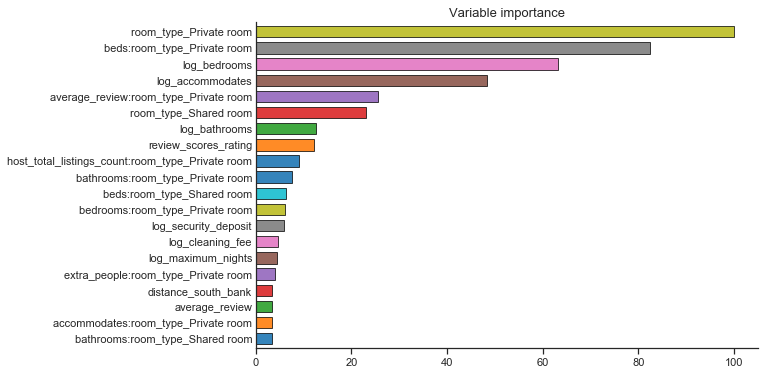

In [121]:
from statlearning import plot_feature_importance

# XGBoost
plot_feature_importance(xbst, predictors)
plt.show()

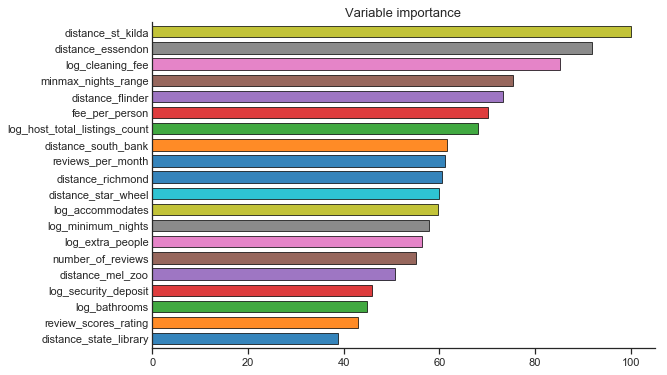

In [122]:
# LightGBM
plot_feature_importance(lbst, predictors)
plt.show()

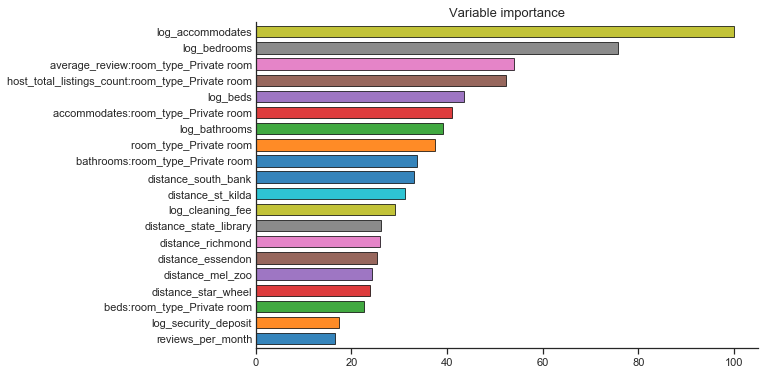

In [123]:
# Random Forest
plot_feature_importance(rf, predictors)
plt.show()

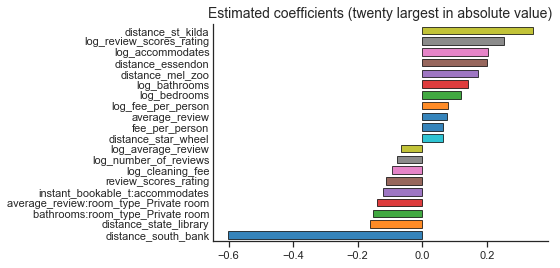

In [124]:
from statlearning import plot_coefficients
# Elastic Net
plot_coefficients(enet._final_estimator, predictors)
plt.show()

In [149]:
pred = lbst.predict(X_train.values)
resid = pred - y_train.ravel()

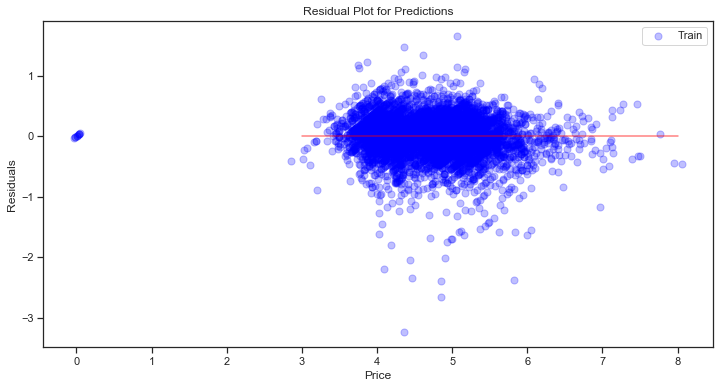

In [148]:
fig, ax = plt.subplots(figsize=(12,6))

sns.regplot(pred, resid, fit_reg=False, ax=ax, scatter_kws={'alpha':0.25, 'color':'blue', 's':50}, label='Train')
ax.set_title('Residual Plot for Predictions')
ax.set_xlabel('Price')
ax.set_ylabel('Residuals')
ax.legend()

ax.plot([3,8], [0,0], color='red', alpha=0.5)

plt.show()

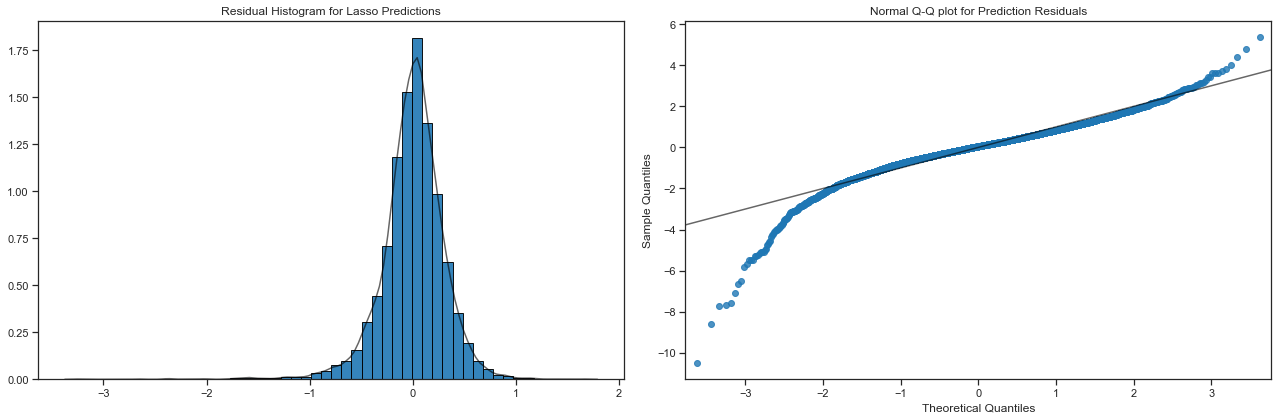

In [128]:
fig, ax = plt.subplots(1,2, figsize=(18,6))

sns.distplot(resid, ax=ax[0], hist_kws={'alpha': 0.9, 'edgecolor':'black'}, kde_kws={'color': 'black', 'alpha': 0.6})
ax[0].set_title('Residual Histogram for Lasso Predictions', fontsize=12)

pp = sm.ProbPlot(resid, fit=True)
qq = pp.qqplot(color=sns.color_palette()[0], alpha=0.8, ax=ax[1])

a=ax[1].get_xlim()[0]
b=ax[1].get_xlim()[1]
ax[1].plot([a,b],[a,b], color='black', alpha=0.6)
ax[1].set_xlim(a,b)
ax[1].set_title('Normal Q-Q plot for Prediction Residuals', fontsize=12)

plt.tight_layout()
plt.show()